## KAN (Kolmogorov Arnold Network) method

1. Problem: Classification of Heart Disease using KAN appoach

2. Research paper on KAN: Kolmogorov-Arnold Networks: https://arxiv.org/pdf/2404.19756

3. You can access dataset from Kaggle: https://www.kaggle.com/competitions/heart-disease-uci/data

4. Access 'imodelsx' scikit-learn library to explain, predict, and steer text models/data from here: https://pypi.org/project/imodelsx/

5. Access Module imodelsx.kan.kan_sklearn from here: https://csinva.io/imodelsX/kan/kan_sklearn.html


In [2]:
#installing imodelsx for implemeting KAN (Kolmogorov-Arnold Networks)
#For more information, please refer this: https://pypi.org/project/imodelsx/
!pip install imodelsx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.0/114.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.2/237.2 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 44.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━

In [32]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imodelsx import KANClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#reading heart disease classification dataset. Please refer this documentation: /content/data/documentation.pdf
df = '/content/data/heart_statlog_cleveland_hungary_final.csv'
df = pd.read_csv(df)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [5]:
#extracting input and output data from the training dataset
X = df.iloc[:, :-1]  # All rows, exclude the last column
y = df.iloc[:, -1]    # All rows, only the last column

#initializing and fitting the scaler on the features
scaler = StandardScaler().fit(X)
#scaling the features
X_scaled = scaler.transform(X)
X_scaled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=12, stratify=y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-1.35982478,  0.55599543,  0.82048698, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-1.35982478,  0.55599543,  0.82048698, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [ 0.67133319,  0.55599543,  0.82048698, ...,  1.25751537,
         0.16321028,  2.25438257],
       ...,
       [-1.35982478, -1.79857595, -0.24893198, ...,  1.25751537,
        -0.84979236, -1.02321701],
       [-1.68053393, -1.79857595,  0.82048698, ..., -0.79521891,
         1.72875982, -1.02321701],
       [ 1.0989454 ,  0.55599543,  0.82048698, ...,  1.25751537,
         0.53157488,  0.61558278]])

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(833, 11)
(833,)
(357, 11)
(357,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#initializing a KANClassifier using GPU acceleration (CUDA device).
#KANClassifier() has default value of each parameter.
model = KANClassifier(device='cuda',
                      hidden_layer_size=64,
                      regularize_activation=1,
                      regularize_entropy=1,
                      regularize_ridge=0)

#training the model on training dataset (X_train, y_train)
model=model.fit(X_train, y_train)
#predicting output for the X_test dataset
y_pred = model.predict(X_test)

#accuracy on test dataset
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy_test)
#classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))
#Cohen's Kappa score for the test set
kappa_test = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score on Test Set:", kappa_test)
#confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:02<00:00, 40.80it/s]

Accuracy on Test Set: 0.7507002801120448
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       168
           1       0.83      0.67      0.74       189

    accuracy                           0.75       357
   macro avg       0.76      0.76      0.75       357
weighted avg       0.76      0.75      0.75       357

Cohen's Kappa Score on Test Set: 0.505717085919634
Confusion Matrix for Test Set:
[[142  26]
 [ 63 126]]


###**Interpretation**

1. The model achieved an accuracy of 73.67% on the test set, shows good predictive ability.

2. The Cohen's Kappa score of 0.469 show moderate agreement between predicted and actual data points, indicating scope for improvement.

3. Analysis of the confusion matrix (114 true positives, 149 true negatives, 54 false positives (FP), 40 false negatives(FN))

4. There is need of improvement in model performance as there are 54 FP and 40 FN.

In [23]:
#defining hyperparameter ranges
#adjusting hidden layer sizes
hidden_layers = [32, 64, 128, 256]
#different activation regularization values
activations = [0.1, 0.3, 0.5, 0.7]
#different entropy regularization values
entropies = [0.1, 0.3, 0.5, 0.7]
#different ridge regularization values
ridges = [0.1, 0.3, 0.5, 0.7]


#iterating through combinations of hyperparameters including the new dropout rate
for hidden_layer_size in hidden_layers:
    for regularize_activation in activations:
        for regularize_entropy in entropies:
            for regularize_ridge in ridges:
                    kan_model = KANClassifier(hidden_layer_size=hidden_layer_size, device='cuda',
                                          regularize_activation=regularize_activation,
                                          regularize_entropy=regularize_entropy,
                                          regularize_ridge=regularize_ridge)

                    #training the model
                    kan_model.fit(X_train, y_train)
                    #predicting data points using 'kan_model'
                    y_pred = kan_model.predict(X_test)
                    #printing hyperparameter values
                    print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge)
                    #accuracy on test dataset
                    accuracy_test = accuracy_score(y_test, y_pred)
                    print("Accuracy on Test Set:", accuracy_test)

                    #Cohen's Kappa score for the test set
                    kappa_test = cohen_kappa_score(y_test, y_pred)
                    print("Cohen's Kappa Score on Test Set:", kappa_test)

                    #classification report for the test set
                    #print("Classification Report for Test Set:")
                    print(classification_report(y_test, y_pred))

                    #confusion matrix for the test set
                    conf_matrix_test = confusion_matrix(y_test, y_pred)
                    print("Confusion Matrix for Test Set:\n", conf_matrix_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:02<00:00, 44.54it/s]


Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.41647597254004576
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       168
           1       0.77      0.63      0.69       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.72      0.71      0.70       357

Confusion Matrix for Test Set:
 [[133  35]
 [ 70 119]]


100%|██████████| 100/100 [00:03<00:00, 30.09it/s]


Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.4501650165016502
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       168
           1       0.75      0.72      0.74       189

    accuracy                           0.73       357
   macro avg       0.72      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 52 137]]


 59%|█████▉    | 59/100 [00:01<00:01, 35.52it/s]


	Early stopping
Accuracy on Test Set: 0.6722689075630253
Cohen's Kappa Score on Test Set: 0.3204646395626922
              precision    recall  f1-score   support

           0       0.86      0.36      0.51       168
           1       0.63      0.95      0.75       189

    accuracy                           0.67       357
   macro avg       0.74      0.66      0.63       357
weighted avg       0.74      0.67      0.64       357

Confusion Matrix for Test Set:
 [[ 61 107]
 [ 10 179]]


100%|██████████| 100/100 [00:01<00:00, 55.24it/s]


Accuracy on Test Set: 0.6134453781512605
Cohen's Kappa Score on Test Set: 0.2085020242914979
              precision    recall  f1-score   support

           0       0.64      0.41      0.50       168
           1       0.60      0.79      0.68       189

    accuracy                           0.61       357
   macro avg       0.62      0.60      0.59       357
weighted avg       0.62      0.61      0.60       357

Confusion Matrix for Test Set:
 [[ 69  99]
 [ 39 150]]


100%|██████████| 100/100 [00:01<00:00, 56.37it/s]


Accuracy on Test Set: 0.45938375350140054
Cohen's Kappa Score on Test Set: -0.08319577418289859
              precision    recall  f1-score   support

           0       0.43      0.44      0.43       168
           1       0.49      0.48      0.48       189

    accuracy                           0.46       357
   macro avg       0.46      0.46      0.46       357
weighted avg       0.46      0.46      0.46       357

Confusion Matrix for Test Set:
 [[74 94]
 [99 90]]


100%|██████████| 100/100 [00:01<00:00, 56.12it/s]


Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.4200066247101689
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       168
           1       0.72      0.74      0.73       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 49 140]]


 57%|█████▋    | 57/100 [00:01<00:00, 54.94it/s]


	Early stopping
Accuracy on Test Set: 0.3473389355742297
Cohen's Kappa Score on Test Set: -0.2974123812643301
              precision    recall  f1-score   support

           0       0.34      0.39      0.36       168
           1       0.36      0.31      0.33       189

    accuracy                           0.35       357
   macro avg       0.35      0.35      0.35       357
weighted avg       0.35      0.35      0.35       357

Confusion Matrix for Test Set:
 [[ 66 102]
 [131  58]]


100%|██████████| 100/100 [00:02<00:00, 47.95it/s]


Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.4742268041237113
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       168
           1       0.73      0.80      0.76       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 38 151]]


100%|██████████| 100/100 [00:02<00:00, 37.43it/s]


Accuracy on Test Set: 0.7142857142857143
Cohen's Kappa Score on Test Set: 0.42122830440587455
              precision    recall  f1-score   support

           0       0.74      0.61      0.67       168
           1       0.70      0.80      0.75       189

    accuracy                           0.71       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.72      0.71      0.71       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 55.28it/s]


Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.425713348638898
              precision    recall  f1-score   support

           0       0.67      0.77      0.71       168
           1       0.76      0.66      0.71       189

    accuracy                           0.71       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.72      0.71      0.71       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 64 125]]


 54%|█████▍    | 54/100 [00:00<00:00, 54.83it/s]


	Early stopping
Accuracy on Test Set: 0.7478991596638656
Cohen's Kappa Score on Test Set: 0.4930417495029821
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       168
           1       0.75      0.78      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 42 147]]


100%|██████████| 100/100 [00:01<00:00, 54.96it/s]


Accuracy on Test Set: 0.6330532212885154
Cohen's Kappa Score on Test Set: 0.27340946166394775
              precision    recall  f1-score   support

           0       0.59      0.73      0.65       168
           1       0.70      0.54      0.61       189

    accuracy                           0.63       357
   macro avg       0.64      0.64      0.63       357
weighted avg       0.65      0.63      0.63       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 86 103]]


 54%|█████▍    | 54/100 [00:01<00:01, 41.54it/s]


	Early stopping
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.45377049180327866
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       168
           1       0.78      0.67      0.72       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[132  36]
 [ 62 127]]


 55%|█████▌    | 55/100 [00:01<00:00, 54.37it/s]


	Early stopping
Accuracy on Test Set: 0.5770308123249299
Cohen's Kappa Score on Test Set: 0.16357119582926039
              precision    recall  f1-score   support

           0       0.54      0.68      0.60       168
           1       0.63      0.48      0.55       189

    accuracy                           0.58       357
   macro avg       0.59      0.58      0.58       357
weighted avg       0.59      0.58      0.57       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 98  91]]


100%|██████████| 100/100 [00:01<00:00, 56.22it/s]


Accuracy on Test Set: 0.6946778711484594
Cohen's Kappa Score on Test Set: 0.37122497455039016
              precision    recall  f1-score   support

           0       0.82      0.45      0.58       168
           1       0.65      0.92      0.76       189

    accuracy                           0.69       357
   macro avg       0.74      0.68      0.67       357
weighted avg       0.73      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 75  93]
 [ 16 173]]


100%|██████████| 100/100 [00:02<00:00, 45.62it/s]


Accuracy on Test Set: 0.7170868347338936
Cohen's Kappa Score on Test Set: 0.429757555629359
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       168
           1       0.72      0.77      0.74       189

    accuracy                           0.72       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 44 145]]


100%|██████████| 100/100 [00:02<00:00, 40.00it/s]


Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.4461436170212766
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       168
           1       0.72      0.78      0.75       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 41 148]]


 53%|█████▎    | 53/100 [00:00<00:00, 54.24it/s]


	Early stopping
Accuracy on Test Set: 0.6834733893557423
Cohen's Kappa Score on Test Set: 0.35945315105035014
              precision    recall  f1-score   support

           0       0.69      0.59      0.64       168
           1       0.68      0.77      0.72       189

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 44 145]]


100%|██████████| 100/100 [00:01<00:00, 56.61it/s]


Accuracy on Test Set: 0.4649859943977591
Cohen's Kappa Score on Test Set: -0.052512155591572185
              precision    recall  f1-score   support

           0       0.45      0.61      0.52       168
           1       0.49      0.33      0.40       189

    accuracy                           0.46       357
   macro avg       0.47      0.47      0.46       357
weighted avg       0.47      0.46      0.45       357

Confusion Matrix for Test Set:
 [[103  65]
 [126  63]]


100%|██████████| 100/100 [00:01<00:00, 56.14it/s]


Accuracy on Test Set: 0.6862745098039216
Cohen's Kappa Score on Test Set: 0.3699536730641958
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       168
           1       0.70      0.71      0.71       189

    accuracy                           0.69       357
   macro avg       0.69      0.68      0.68       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 55 134]]


100%|██████████| 100/100 [00:01<00:00, 55.21it/s]


Accuracy on Test Set: 0.4061624649859944
Cohen's Kappa Score on Test Set: -0.17547292889758648
              precision    recall  f1-score   support

           0       0.40      0.49      0.44       168
           1       0.42      0.33      0.37       189

    accuracy                           0.41       357
   macro avg       0.41      0.41      0.40       357
weighted avg       0.41      0.41      0.40       357

Confusion Matrix for Test Set:
 [[ 83  85]
 [127  62]]


100%|██████████| 100/100 [00:01<00:00, 55.74it/s]


Accuracy on Test Set: 0.6862745098039216
Cohen's Kappa Score on Test Set: 0.36107382550335565
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       168
           1       0.67      0.82      0.73       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.69      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 47.88it/s]


Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5600530856005308
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.78      0.82      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 40.43it/s]


Accuracy on Test Set: 0.5182072829131653
Cohen's Kappa Score on Test Set: 0.023380093520374068
              precision    recall  f1-score   support

           0       0.49      0.40      0.44       168
           1       0.54      0.62      0.58       189

    accuracy                           0.52       357
   macro avg       0.51      0.51      0.51       357
weighted avg       0.51      0.52      0.51       357

Confusion Matrix for Test Set:
 [[ 67 101]
 [ 71 118]]


100%|██████████| 100/100 [00:02<00:00, 47.53it/s]


Accuracy on Test Set: 0.6946778711484594
Cohen's Kappa Score on Test Set: 0.37964512889186475
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       168
           1       0.68      0.81      0.74       189

    accuracy                           0.69       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 56.34it/s]


Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49381063900970223
              precision    recall  f1-score   support

           0       0.80      0.63      0.70       168
           1       0.72      0.86      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 54.79it/s]


Accuracy on Test Set: 0.7142857142857143
Cohen's Kappa Score on Test Set: 0.43407310704960844
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       168
           1       0.79      0.62      0.70       189

    accuracy                           0.71       357
   macro avg       0.73      0.72      0.71       357
weighted avg       0.73      0.71      0.71       357

Confusion Matrix for Test Set:
 [[137  31]
 [ 71 118]]


100%|██████████| 100/100 [00:01<00:00, 56.73it/s]


Accuracy on Test Set: 0.5770308123249299
Cohen's Kappa Score on Test Set: 0.17006142903330101
              precision    recall  f1-score   support

           0       0.54      0.76      0.63       168
           1       0.66      0.42      0.51       189

    accuracy                           0.58       357
   macro avg       0.60      0.59      0.57       357
weighted avg       0.60      0.58      0.57       357

Confusion Matrix for Test Set:
 [[127  41]
 [110  79]]


100%|██████████| 100/100 [00:01<00:00, 55.19it/s]


Accuracy on Test Set: 0.6526610644257703
Cohen's Kappa Score on Test Set: 0.2926174496644295
              precision    recall  f1-score   support

           0       0.68      0.50      0.58       168
           1       0.64      0.79      0.71       189

    accuracy                           0.65       357
   macro avg       0.66      0.64      0.64       357
weighted avg       0.66      0.65      0.64       357

Confusion Matrix for Test Set:
 [[ 84  84]
 [ 40 149]]


100%|██████████| 100/100 [00:02<00:00, 39.15it/s]


Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.4126132170412613
              precision    recall  f1-score   support

           0       0.76      0.57      0.65       168
           1       0.69      0.84      0.76       189

    accuracy                           0.71       357
   macro avg       0.72      0.70      0.70       357
weighted avg       0.72      0.71      0.71       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 51.36it/s]


Accuracy on Test Set: 0.6862745098039216
Cohen's Kappa Score on Test Set: 0.3571910871033086
              precision    recall  f1-score   support

           0       0.76      0.48      0.59       168
           1       0.65      0.87      0.75       189

    accuracy                           0.69       357
   macro avg       0.71      0.67      0.67       357
weighted avg       0.71      0.69      0.67       357

Confusion Matrix for Test Set:
 [[ 81  87]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 56.07it/s]


Accuracy on Test Set: 0.5602240896358543
Cohen's Kappa Score on Test Set: 0.09861533265788591
              precision    recall  f1-score   support

           0       0.55      0.35      0.42       168
           1       0.56      0.75      0.64       189

    accuracy                           0.56       357
   macro avg       0.56      0.55      0.53       357
weighted avg       0.56      0.56      0.54       357

Confusion Matrix for Test Set:
 [[ 58 110]
 [ 47 142]]


100%|██████████| 100/100 [00:01<00:00, 56.26it/s]


Accuracy on Test Set: 0.7170868347338936
Cohen's Kappa Score on Test Set: 0.43164515061238007
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       168
           1       0.73      0.74      0.73       189

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 49 140]]


100%|██████████| 100/100 [00:01<00:00, 55.64it/s]


Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5059445178335535
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       168
           1       0.77      0.76      0.76       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 46 143]]


 60%|██████    | 60/100 [00:01<00:00, 55.79it/s]


	Early stopping
Accuracy on Test Set: 0.6722689075630253
Cohen's Kappa Score on Test Set: 0.34722678043977684
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       168
           1       0.72      0.63      0.67       189

    accuracy                           0.67       357
   macro avg       0.68      0.67      0.67       357
weighted avg       0.68      0.67      0.67       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 70 119]]


100%|██████████| 100/100 [00:01<00:00, 56.40it/s]


Accuracy on Test Set: 0.6750700280112045
Cohen's Kappa Score on Test Set: 0.33016304347826086
              precision    recall  f1-score   support

           0       0.80      0.42      0.55       168
           1       0.64      0.90      0.75       189

    accuracy                           0.68       357
   macro avg       0.72      0.66      0.65       357
weighted avg       0.71      0.68      0.65       357

Confusion Matrix for Test Set:
 [[ 70  98]
 [ 18 171]]


100%|██████████| 100/100 [00:03<00:00, 32.22it/s]


Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5178100263852243
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       168
           1       0.78      0.75      0.77       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 47 142]]


 56%|█████▌    | 56/100 [00:01<00:00, 54.24it/s]


	Early stopping
Accuracy on Test Set: 0.6442577030812325
Cohen's Kappa Score on Test Set: 0.2853359814630917
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       168
           1       0.66      0.67      0.67       189

    accuracy                           0.64       357
   macro avg       0.64      0.64      0.64       357
weighted avg       0.64      0.64      0.64       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 62 127]]


 54%|█████▍    | 54/100 [00:01<00:00, 53.95it/s]


	Early stopping
Accuracy on Test Set: 0.6358543417366946
Cohen's Kappa Score on Test Set: 0.2593833780160858
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       168
           1       0.63      0.76      0.69       189

    accuracy                           0.64       357
   macro avg       0.64      0.63      0.62       357
weighted avg       0.64      0.64      0.63       357

Confusion Matrix for Test Set:
 [[ 83  85]
 [ 45 144]]


100%|██████████| 100/100 [00:01<00:00, 56.35it/s]


Accuracy on Test Set: 0.6778711484593838
Cohen's Kappa Score on Test Set: 0.33480775774072813
              precision    recall  f1-score   support

           0       0.82      0.40      0.54       168
           1       0.64      0.92      0.75       189

    accuracy                           0.68       357
   macro avg       0.73      0.66      0.65       357
weighted avg       0.72      0.68      0.65       357

Confusion Matrix for Test Set:
 [[ 68 100]
 [ 15 174]]


100%|██████████| 100/100 [00:01<00:00, 56.36it/s]


Accuracy on Test Set: 0.6498599439775911
Cohen's Kappa Score on Test Set: 0.2842707982485686
              precision    recall  f1-score   support

           0       0.69      0.46      0.56       168
           1       0.63      0.81      0.71       189

    accuracy                           0.65       357
   macro avg       0.66      0.64      0.63       357
weighted avg       0.66      0.65      0.64       357

Confusion Matrix for Test Set:
 [[ 78  90]
 [ 35 154]]


 61%|██████    | 61/100 [00:01<00:00, 54.39it/s]


	Early stopping
Accuracy on Test Set: 0.6246498599439776
Cohen's Kappa Score on Test Set: 0.24218230206254154
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       168
           1       0.63      0.69      0.66       189

    accuracy                           0.62       357
   macro avg       0.62      0.62      0.62       357
weighted avg       0.62      0.62      0.62       357

Confusion Matrix for Test Set:
 [[ 92  76]
 [ 58 131]]


100%|██████████| 100/100 [00:01<00:00, 54.38it/s]


Accuracy on Test Set: 0.5546218487394958
Cohen's Kappa Score on Test Set: 0.13058861370215502
              precision    recall  f1-score   support

           0       0.52      0.78      0.62       168
           1       0.64      0.35      0.46       189

    accuracy                           0.55       357
   macro avg       0.58      0.57      0.54       357
weighted avg       0.58      0.55      0.53       357

Confusion Matrix for Test Set:
 [[131  37]
 [122  67]]


 59%|█████▉    | 59/100 [00:01<00:00, 52.18it/s]


	Early stopping
Accuracy on Test Set: 0.6946778711484594
Cohen's Kappa Score on Test Set: 0.3788132752262823
              precision    recall  f1-score   support

           0       0.73      0.55      0.63       168
           1       0.67      0.82      0.74       189

    accuracy                           0.69       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[ 93  75]
 [ 34 155]]


 56%|█████▌    | 56/100 [00:01<00:01, 40.67it/s]


	Early stopping
Accuracy on Test Set: 0.4789915966386555
Cohen's Kappa Score on Test Set: -0.05400000000000005
              precision    recall  f1-score   support

           0       0.44      0.38      0.40       168
           1       0.51      0.57      0.54       189

    accuracy                           0.48       357
   macro avg       0.47      0.47      0.47       357
weighted avg       0.47      0.48      0.47       357

Confusion Matrix for Test Set:
 [[ 63 105]
 [ 81 108]]


100%|██████████| 100/100 [00:02<00:00, 40.54it/s]


Accuracy on Test Set: 0.6554621848739496
Cohen's Kappa Score on Test Set: 0.2966700302724521
              precision    recall  f1-score   support

           0       0.69      0.48      0.57       168
           1       0.64      0.81      0.71       189

    accuracy                           0.66       357
   macro avg       0.66      0.65      0.64       357
weighted avg       0.66      0.66      0.65       357

Confusion Matrix for Test Set:
 [[ 81  87]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 56.01it/s]


Accuracy on Test Set: 0.6722689075630253
Cohen's Kappa Score on Test Set: 0.3381031613976705
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       168
           1       0.67      0.74      0.71       189

    accuracy                           0.67       357
   macro avg       0.67      0.67      0.67       357
weighted avg       0.67      0.67      0.67       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 49 140]]


100%|██████████| 100/100 [00:01<00:00, 56.08it/s]


Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4631578947368421
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       168
           1       0.77      0.70      0.73       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 56 133]]


100%|██████████| 100/100 [00:01<00:00, 54.76it/s]


Accuracy on Test Set: 0.7282913165266106
Cohen's Kappa Score on Test Set: 0.45197740112994356
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       168
           1       0.73      0.78      0.75       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 41 148]]


100%|██████████| 100/100 [00:02<00:00, 47.05it/s]


Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.48655824759376043
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       168
           1       0.74      0.79      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 51.94it/s]


Accuracy on Test Set: 0.6610644257703081
Cohen's Kappa Score on Test Set: 0.32490974729241884
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       168
           1       0.70      0.62      0.66       189

    accuracy                           0.66       357
   macro avg       0.66      0.66      0.66       357
weighted avg       0.67      0.66      0.66       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 72 117]]


 59%|█████▉    | 59/100 [00:01<00:01, 36.92it/s]


	Early stopping
Accuracy on Test Set: 0.5070028011204482
Cohen's Kappa Score on Test Set: 0.01837270341207342
              precision    recall  f1-score   support

           0       0.48      0.55      0.51       168
           1       0.54      0.47      0.50       189

    accuracy                           0.51       357
   macro avg       0.51      0.51      0.51       357
weighted avg       0.51      0.51      0.51       357

Confusion Matrix for Test Set:
 [[ 92  76]
 [100  89]]


100%|██████████| 100/100 [00:02<00:00, 42.67it/s]


Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.4094435075885329
              precision    recall  f1-score   support

           0       0.80      0.52      0.63       168
           1       0.67      0.88      0.76       189

    accuracy                           0.71       357
   macro avg       0.74      0.70      0.70       357
weighted avg       0.73      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 56.07it/s]


Accuracy on Test Set: 0.7478991596638656
Cohen's Kappa Score on Test Set: 0.4930417495029821
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       168
           1       0.75      0.78      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 42 147]]


 59%|█████▉    | 59/100 [00:01<00:00, 55.22it/s]


	Early stopping
Accuracy on Test Set: 0.48179271708683474
Cohen's Kappa Score on Test Set: -0.03829646748101667
              precision    recall  f1-score   support

           0       0.45      0.46      0.46       168
           1       0.51      0.50      0.50       189

    accuracy                           0.48       357
   macro avg       0.48      0.48      0.48       357
weighted avg       0.48      0.48      0.48       357

Confusion Matrix for Test Set:
 [[78 90]
 [95 94]]


100%|██████████| 100/100 [00:01<00:00, 55.41it/s]


Accuracy on Test Set: 0.41456582633053224
Cohen's Kappa Score on Test Set: -0.16990451103062232
              precision    recall  f1-score   support

           0       0.39      0.42      0.40       168
           1       0.44      0.41      0.43       189

    accuracy                           0.41       357
   macro avg       0.41      0.41      0.41       357
weighted avg       0.42      0.41      0.42       357

Confusion Matrix for Test Set:
 [[ 70  98]
 [111  78]]


100%|██████████| 100/100 [00:01<00:00, 53.56it/s]


Accuracy on Test Set: 0.5406162464985994
Cohen's Kappa Score on Test Set: 0.08709888670595944
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       168
           1       0.58      0.49      0.53       189

    accuracy                           0.54       357
   macro avg       0.54      0.54      0.54       357
weighted avg       0.55      0.54      0.54       357

Confusion Matrix for Test Set:
 [[101  67]
 [ 97  92]]


100%|██████████| 100/100 [00:01<00:00, 55.80it/s]


Accuracy on Test Set: 0.7142857142857143
Cohen's Kappa Score on Test Set: 0.4344422700587084
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       168
           1       0.80      0.62      0.70       189

    accuracy                           0.71       357
   macro avg       0.73      0.72      0.71       357
weighted avg       0.73      0.71      0.71       357

Confusion Matrix for Test Set:
 [[138  30]
 [ 72 117]]


100%|██████████| 100/100 [00:02<00:00, 44.90it/s]


Accuracy on Test Set: 0.6946778711484594
Cohen's Kappa Score on Test Set: 0.3837712005320918
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       168
           1       0.69      0.76      0.72       189

    accuracy                           0.69       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 46 143]]


100%|██████████| 100/100 [00:02<00:00, 41.87it/s]


Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5036496350364963
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       168
           1       0.75      0.79      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 39 150]]


100%|██████████| 100/100 [00:01<00:00, 56.63it/s]


Accuracy on Test Set: 0.5714285714285714
Cohen's Kappa Score on Test Set: 0.1596122778675283
              precision    recall  f1-score   support

           0       0.53      0.76      0.62       168
           1       0.65      0.41      0.50       189

    accuracy                           0.57       357
   macro avg       0.59      0.58      0.56       357
weighted avg       0.60      0.57      0.56       357

Confusion Matrix for Test Set:
 [[127  41]
 [112  77]]


 64%|██████▍   | 64/100 [00:01<00:00, 43.71it/s]


	Early stopping
Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.40835266821345706
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       168
           1       0.71      0.74      0.73       189

    accuracy                           0.71       357
   macro avg       0.70      0.70      0.70       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 49 140]]


100%|██████████| 100/100 [00:01<00:00, 54.52it/s]


Accuracy on Test Set: 0.6694677871148459
Cohen's Kappa Score on Test Set: 0.33355481727574754
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       168
           1       0.67      0.72      0.70       189

    accuracy                           0.67       357
   macro avg       0.67      0.67      0.67       357
weighted avg       0.67      0.67      0.67       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 52 137]]


100%|██████████| 100/100 [00:01<00:00, 55.68it/s]


Accuracy on Test Set: 0.6974789915966386
Cohen's Kappa Score on Test Set: 0.3733788395904437
              precision    recall  f1-score   support

           0       0.91      0.40      0.55       168
           1       0.64      0.96      0.77       189

    accuracy                           0.70       357
   macro avg       0.77      0.68      0.66       357
weighted avg       0.77      0.70      0.67       357

Confusion Matrix for Test Set:
 [[ 67 101]
 [  7 182]]


100%|██████████| 100/100 [00:01<00:00, 54.35it/s]


Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5065065065065064
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       168
           1       0.74      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 39.33it/s]


Accuracy on Test Set: 0.4789915966386555
Cohen's Kappa Score on Test Set: -0.04218852999340794
              precision    recall  f1-score   support

           0       0.45      0.48      0.46       168
           1       0.51      0.48      0.49       189

    accuracy                           0.48       357
   macro avg       0.48      0.48      0.48       357
weighted avg       0.48      0.48      0.48       357

Confusion Matrix for Test Set:
 [[80 88]
 [98 91]]


100%|██████████| 100/100 [00:02<00:00, 42.14it/s]


Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.4435537742150969
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       168
           1       0.71      0.82      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 56.26it/s]


Accuracy on Test Set: 0.7478991596638656
Cohen's Kappa Score on Test Set: 0.4858870967741935
              precision    recall  f1-score   support

           0       0.82      0.59      0.69       168
           1       0.71      0.89      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.74      0.74       357
weighted avg       0.76      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 21 168]]


100%|██████████| 100/100 [00:01<00:00, 54.96it/s]


Accuracy on Test Set: 0.7030812324929971
Cohen's Kappa Score on Test Set: 0.404887714663144
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       168
           1       0.72      0.71      0.72       189

    accuracy                           0.70       357
   macro avg       0.70      0.70      0.70       357
weighted avg       0.70      0.70      0.70       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 55 134]]


 59%|█████▉    | 59/100 [00:01<00:00, 53.73it/s]


	Early stopping
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5393108062897289
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       168
           1       0.74      0.88      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 54.99it/s]


Accuracy on Test Set: 0.6694677871148459
Cohen's Kappa Score on Test Set: 0.31675749318801083
              precision    recall  f1-score   support

           0       0.81      0.39      0.52       168
           1       0.63      0.92      0.75       189

    accuracy                           0.67       357
   macro avg       0.72      0.65      0.64       357
weighted avg       0.71      0.67      0.64       357

Confusion Matrix for Test Set:
 [[ 65 103]
 [ 15 174]]


100%|██████████| 100/100 [00:01<00:00, 55.01it/s]


Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5142857142857142
              precision    recall  f1-score   support

           0       0.71      0.80      0.76       168
           1       0.80      0.71      0.76       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[135  33]
 [ 54 135]]


100%|██████████| 100/100 [00:02<00:00, 42.32it/s]


Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.45418060200668897
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       168
           1       0.71      0.84      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.72      0.72       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 31 158]]


 60%|██████    | 60/100 [00:01<00:01, 37.91it/s]


	Early stopping
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5243171219187208
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       168
           1       0.75      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 31 158]]


 57%|█████▋    | 57/100 [00:01<00:01, 41.12it/s]


	Early stopping
Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.408246029063873
              precision    recall  f1-score   support

           0       0.82      0.50      0.62       168
           1       0.67      0.90      0.77       189

    accuracy                           0.71       357
   macro avg       0.74      0.70      0.69       357
weighted avg       0.74      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 84  84]
 [ 19 170]]


100%|██████████| 100/100 [00:02<00:00, 41.31it/s]


Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5084745762711864
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       168
           1       0.75      0.81      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 36 153]]


 72%|███████▏  | 72/100 [00:02<00:00, 30.47it/s]


	Early stopping
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5298233922025992
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       168
           1       0.75      0.84      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 42.98it/s]


Accuracy on Test Set: 0.5686274509803921
Cohen's Kappa Score on Test Set: 0.15110246433203633
              precision    recall  f1-score   support

           0       0.53      0.72      0.61       168
           1       0.64      0.43      0.52       189

    accuracy                           0.57       357
   macro avg       0.58      0.58      0.56       357
weighted avg       0.59      0.57      0.56       357

Confusion Matrix for Test Set:
 [[121  47]
 [107  82]]


 61%|██████    | 61/100 [00:02<00:01, 27.53it/s]


	Early stopping
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.4998347107438016
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       168
           1       0.77      0.76      0.76       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 45 144]]


100%|██████████| 100/100 [00:03<00:00, 26.16it/s]


Accuracy on Test Set: 0.6778711484593838
Cohen's Kappa Score on Test Set: 0.3642276422764228
              precision    recall  f1-score   support

           0       0.62      0.81      0.70       168
           1       0.77      0.56      0.65       189

    accuracy                           0.68       357
   macro avg       0.69      0.69      0.68       357
weighted avg       0.70      0.68      0.67       357

Confusion Matrix for Test Set:
 [[136  32]
 [ 83 106]]


100%|██████████| 100/100 [00:03<00:00, 32.00it/s]


Accuracy on Test Set: 0.48739495798319327
Cohen's Kappa Score on Test Set: -0.0464177598385469
              precision    recall  f1-score   support

           0       0.44      0.30      0.36       168
           1       0.51      0.65      0.57       189

    accuracy                           0.49       357
   macro avg       0.47      0.48      0.47       357
weighted avg       0.48      0.49      0.47       357

Confusion Matrix for Test Set:
 [[ 51 117]
 [ 66 123]]


100%|██████████| 100/100 [00:02<00:00, 44.01it/s]


Accuracy on Test Set: 0.6778711484593838
Cohen's Kappa Score on Test Set: 0.3307086614173228
              precision    recall  f1-score   support

           0       0.91      0.35      0.51       168
           1       0.63      0.97      0.76       189

    accuracy                           0.68       357
   macro avg       0.77      0.66      0.63       357
weighted avg       0.76      0.68      0.64       357

Confusion Matrix for Test Set:
 [[ 59 109]
 [  6 183]]


100%|██████████| 100/100 [00:01<00:00, 55.06it/s]


Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.44280936454849495
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       168
           1       0.70      0.83      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 32 157]]


 58%|█████▊    | 58/100 [00:01<00:00, 52.35it/s]


	Early stopping
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5052910052910053
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       168
           1       0.77      0.77      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 44 145]]


100%|██████████| 100/100 [00:02<00:00, 37.78it/s]


Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5600530856005308
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.78      0.82      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 44.65it/s]


Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5071642785738087
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       168
           1       0.74      0.83      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 54.81it/s]


Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.4611277944611277
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       168
           1       0.72      0.82      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 45.87it/s]


Accuracy on Test Set: 0.6974789915966386
Cohen's Kappa Score on Test Set: 0.3784698713608666
              precision    recall  f1-score   support

           0       0.81      0.47      0.59       168
           1       0.66      0.90      0.76       189

    accuracy                           0.70       357
   macro avg       0.73      0.68      0.68       357
weighted avg       0.73      0.70      0.68       357

Confusion Matrix for Test Set:
 [[ 79  89]
 [ 19 170]]


100%|██████████| 100/100 [00:01<00:00, 55.21it/s]


Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.45852687458526875
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       168
           1       0.73      0.77      0.75       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 43 146]]


100%|██████████| 100/100 [00:01<00:00, 54.65it/s]


Accuracy on Test Set: 0.6526610644257703
Cohen's Kappa Score on Test Set: 0.2878378378378379
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       168
           1       0.63      0.84      0.72       189

    accuracy                           0.65       357
   macro avg       0.67      0.64      0.63       357
weighted avg       0.67      0.65      0.64       357

Confusion Matrix for Test Set:
 [[ 74  94]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 44.71it/s]


Accuracy on Test Set: 0.7366946778711485
Cohen's Kappa Score on Test Set: 0.47121111846459296
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       168
           1       0.75      0.76      0.75       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 46 143]]


100%|██████████| 100/100 [00:02<00:00, 38.63it/s]


Accuracy on Test Set: 0.803921568627451
Cohen's Kappa Score on Test Set: 0.6051758460517584
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       168
           1       0.80      0.84      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 54.77it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5673141326188882
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       168
           1       0.75      0.90      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.78      0.78       357
weighted avg       0.80      0.79      0.78       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 19 170]]


100%|██████████| 100/100 [00:01<00:00, 55.58it/s]


Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.519134775374376
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       168
           1       0.75      0.83      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 33 156]]


100%|██████████| 100/100 [00:01<00:00, 54.61it/s]


Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49617049617049624
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       168
           1       0.74      0.82      0.78       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 55.28it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5517468688200395
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       168
           1       0.80      0.76      0.78       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[133  35]
 [ 45 144]]


100%|██████████| 100/100 [00:01<00:00, 54.80it/s]


Accuracy on Test Set: 0.7282913165266106
Cohen's Kappa Score on Test Set: 0.4527049452373051
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       168
           1       0.73      0.77      0.75       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 43 146]]


100%|██████████| 100/100 [00:02<00:00, 37.63it/s]


Accuracy on Test Set: 0.6610644257703081
Cohen's Kappa Score on Test Set: 0.3024754153950492
              precision    recall  f1-score   support

           0       0.75      0.42      0.54       168
           1       0.63      0.88      0.73       189

    accuracy                           0.66       357
   macro avg       0.69      0.65      0.63       357
weighted avg       0.69      0.66      0.64       357

Confusion Matrix for Test Set:
 [[ 70  98]
 [ 23 166]]


 54%|█████▍    | 54/100 [00:01<00:01, 45.86it/s]


	Early stopping
Accuracy on Test Set: 0.5994397759103641
Cohen's Kappa Score on Test Set: 0.2119935170178282
              precision    recall  f1-score   support

           0       0.55      0.76      0.64       168
           1       0.68      0.46      0.55       189

    accuracy                           0.60       357
   macro avg       0.62      0.61      0.59       357
weighted avg       0.62      0.60      0.59       357

Confusion Matrix for Test Set:
 [[127  41]
 [102  87]]


100%|██████████| 100/100 [00:01<00:00, 55.22it/s]


Accuracy on Test Set: 0.5490196078431373
Cohen's Kappa Score on Test Set: 0.07999999999999996
              precision    recall  f1-score   support

           0       0.53      0.38      0.44       168
           1       0.56      0.70      0.62       189

    accuracy                           0.55       357
   macro avg       0.54      0.54      0.53       357
weighted avg       0.54      0.55      0.54       357

Confusion Matrix for Test Set:
 [[ 63 105]
 [ 56 133]]


100%|██████████| 100/100 [00:02<00:00, 46.91it/s]


Accuracy on Test Set: 0.7366946778711485
Cohen's Kappa Score on Test Set: 0.46804260985352863
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       168
           1       0.73      0.80      0.76       189

    accuracy                           0.74       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.74      0.73       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 54.93it/s]


Accuracy on Test Set: 0.6442577030812325
Cohen's Kappa Score on Test Set: 0.2648961525366019
              precision    recall  f1-score   support

           0       0.75      0.36      0.49       168
           1       0.61      0.89      0.73       189

    accuracy                           0.64       357
   macro avg       0.68      0.63      0.61       357
weighted avg       0.68      0.64      0.62       357

Confusion Matrix for Test Set:
 [[ 61 107]
 [ 20 169]]


100%|██████████| 100/100 [00:01<00:00, 54.98it/s]


Accuracy on Test Set: 0.680672268907563
Cohen's Kappa Score on Test Set: 0.3612392880685563
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       168
           1       0.71      0.67      0.69       189

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 62 127]]


100%|██████████| 100/100 [00:02<00:00, 49.28it/s]


Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.4855337545726638
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       168
           1       0.74      0.80      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 37.03it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5533754572663785
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       168
           1       0.77      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 54.47it/s]


Accuracy on Test Set: 0.5966386554621849
Cohen's Kappa Score on Test Set: 0.203125
              precision    recall  f1-score   support

           0       0.56      0.71      0.63       168
           1       0.66      0.49      0.56       189

    accuracy                           0.60       357
   macro avg       0.61      0.60      0.59       357
weighted avg       0.61      0.60      0.59       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 96  93]]


100%|██████████| 100/100 [00:01<00:00, 54.54it/s]


Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.4769230769230769
              precision    recall  f1-score   support

           0       0.78      0.62      0.70       168
           1       0.72      0.85      0.78       189

    accuracy                           0.74       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 54.59it/s]


Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.499330655957162
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       168
           1       0.72      0.86      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 54.52it/s]


Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.49899531145344944
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       168
           1       0.72      0.87      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 54.61it/s]


Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.44976399190829397
              precision    recall  f1-score   support

           0       0.83      0.54      0.65       168
           1       0.69      0.90      0.78       189

    accuracy                           0.73       357
   macro avg       0.76      0.72      0.72       357
weighted avg       0.75      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 91  77]
 [ 19 170]]


100%|██████████| 100/100 [00:02<00:00, 40.06it/s]


Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.3926505614154474
              precision    recall  f1-score   support

           0       0.88      0.43      0.58       168
           1       0.65      0.95      0.77       189

    accuracy                           0.71       357
   macro avg       0.77      0.69      0.68       357
weighted avg       0.76      0.71      0.68       357

Confusion Matrix for Test Set:
 [[ 73  95]
 [ 10 179]]


100%|██████████| 100/100 [00:02<00:00, 37.68it/s]


Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5340909090909092
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       168
           1       0.74      0.87      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 55.50it/s]


Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5038577658503858
              precision    recall  f1-score   support

           0       0.82      0.61      0.70       168
           1       0.72      0.88      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.75       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 54.39it/s]


Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.40160911833724433
              precision    recall  f1-score   support

           0       0.75      0.57      0.64       168
           1       0.68      0.83      0.75       189

    accuracy                           0.71       357
   macro avg       0.72      0.70      0.70       357
weighted avg       0.71      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 55.25it/s]


Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5133041428090266
              precision    recall  f1-score   support

           0       0.87      0.58      0.70       168
           1       0.71      0.92      0.80       189

    accuracy                           0.76       357
   macro avg       0.79      0.75      0.75       357
weighted avg       0.79      0.76      0.75       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 15 174]]


100%|██████████| 100/100 [00:01<00:00, 54.92it/s]


Accuracy on Test Set: 0.680672268907563
Cohen's Kappa Score on Test Set: 0.3570006635700066
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       168
           1       0.69      0.72      0.71       189

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 52 137]]


100%|██████████| 100/100 [00:02<00:00, 46.40it/s]


Accuracy on Test Set: 0.5294117647058824
Cohen's Kappa Score on Test Set: 0.06114398422090728
              precision    recall  f1-score   support

           0       0.50      0.55      0.53       168
           1       0.56      0.51      0.53       189

    accuracy                           0.53       357
   macro avg       0.53      0.53      0.53       357
weighted avg       0.53      0.53      0.53       357

Confusion Matrix for Test Set:
 [[93 75]
 [93 96]]


100%|██████████| 100/100 [00:02<00:00, 38.71it/s]


Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5612177365982792
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       168
           1       0.79      0.80      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 54.21it/s]


Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.4831272970263949
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       168
           1       0.72      0.84      0.78       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 54.99it/s]


Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.4585987261146497
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       168
           1       0.70      0.86      0.77       189

    accuracy                           0.73       357
   macro avg       0.75      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 27 162]]


 66%|██████▌   | 66/100 [00:01<00:00, 52.48it/s]


	Early stopping
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5861842105263158
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       168
           1       0.83      0.76      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[139  29]
 [ 45 144]]


100%|██████████| 100/100 [00:01<00:00, 53.71it/s]


Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.45932373619015743
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       168
           1       0.71      0.85      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 29 160]]


 68%|██████▊   | 68/100 [00:01<00:00, 52.56it/s]


	Early stopping
Accuracy on Test Set: 0.5462184873949579
Cohen's Kappa Score on Test Set: 0.09941137998691951
              precision    recall  f1-score   support

           0       0.51      0.62      0.56       168
           1       0.59      0.48      0.53       189

    accuracy                           0.55       357
   macro avg       0.55      0.55      0.55       357
weighted avg       0.55      0.55      0.54       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 98  91]]


100%|██████████| 100/100 [00:02<00:00, 38.72it/s]


Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.40160911833724433
              precision    recall  f1-score   support

           0       0.75      0.57      0.64       168
           1       0.68      0.83      0.75       189

    accuracy                           0.71       357
   macro avg       0.72      0.70      0.70       357
weighted avg       0.71      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 39.75it/s]


Accuracy on Test Set: 0.6274509803921569
Cohen's Kappa Score on Test Set: 0.24608202734244744
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       168
           1       0.63      0.71      0.67       189

    accuracy                           0.63       357
   macro avg       0.63      0.62      0.62       357
weighted avg       0.63      0.63      0.62       357

Confusion Matrix for Test Set:
 [[ 89  79]
 [ 54 135]]


100%|██████████| 100/100 [00:01<00:00, 54.76it/s]


Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5165343915343915
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       168
           1       0.77      0.77      0.77       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 43 146]]


 64%|██████▍   | 64/100 [00:01<00:00, 52.85it/s]


	Early stopping
Accuracy on Test Set: 0.6162464985994398
Cohen's Kappa Score on Test Set: 0.23362948338269163
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       168
           1       0.65      0.60      0.62       189

    accuracy                           0.62       357
   macro avg       0.62      0.62      0.62       357
weighted avg       0.62      0.62      0.62       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 76 113]]


100%|██████████| 100/100 [00:01<00:00, 53.47it/s]


Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5263511245384358
              precision    recall  f1-score   support

           0       0.85      0.62      0.71       168
           1       0.73      0.90      0.80       189

    accuracy                           0.77       357
   macro avg       0.79      0.76      0.76       357
weighted avg       0.78      0.77      0.76       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 19 170]]


100%|██████████| 100/100 [00:01<00:00, 53.90it/s]


Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.499330655957162
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       168
           1       0.72      0.86      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 54.26it/s]


Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5210473980775605
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       168
           1       0.77      0.79      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 39 150]]


100%|██████████| 100/100 [00:02<00:00, 41.27it/s]


Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.4783188792528352
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       168
           1       0.73      0.83      0.77       189

    accuracy                           0.74       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 33 156]]


 67%|██████▋   | 67/100 [00:01<00:00, 37.07it/s]


	Early stopping
Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.4834874504623514
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       168
           1       0.76      0.75      0.75       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 48 141]]


100%|██████████| 100/100 [00:01<00:00, 54.25it/s]


Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.4765729585006693
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       168
           1       0.72      0.85      0.78       189

    accuracy                           0.74       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 45.29it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5491775763679088
              precision    recall  f1-score   support

           0       0.86      0.63      0.73       168
           1       0.74      0.91      0.81       189

    accuracy                           0.78       357
   macro avg       0.80      0.77      0.77       357
weighted avg       0.79      0.78      0.77       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 17 172]]


 62%|██████▏   | 62/100 [00:01<00:00, 53.29it/s]


	Early stopping
Accuracy on Test Set: 0.6750700280112045
Cohen's Kappa Score on Test Set: 0.34090909090909094
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       168
           1       0.67      0.78      0.72       189

    accuracy                           0.68       357
   macro avg       0.68      0.67      0.67       357
weighted avg       0.68      0.68      0.67       357

Confusion Matrix for Test Set:
 [[ 94  74]
 [ 42 147]]


100%|██████████| 100/100 [00:02<00:00, 42.23it/s]


Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5828912466843501
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.79      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 39.02it/s]


Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5093959731543624
              precision    recall  f1-score   support

           0       0.83      0.61      0.71       168
           1       0.72      0.89      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.75      0.75       357
weighted avg       0.77      0.76      0.75       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 21 168]]


100%|██████████| 100/100 [00:02<00:00, 35.65it/s]


Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5620608899297423
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       168
           1       0.75      0.89      0.81       189

    accuracy                           0.78       357
   macro avg       0.80      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 21 168]]


100%|██████████| 100/100 [00:01<00:00, 50.31it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5676037483266398
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       168
           1       0.75      0.89      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.78      0.78       357
weighted avg       0.80      0.79      0.78       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 20 169]]


100%|██████████| 100/100 [00:01<00:00, 54.86it/s]


Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5236824549699799
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       168
           1       0.74      0.85      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 54.89it/s]


Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5641025641025641
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 54.76it/s]


Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49313232830820775
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       168
           1       0.72      0.87      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 25 164]]


 59%|█████▉    | 59/100 [00:01<00:00, 54.23it/s]


	Early stopping
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5652607107273331
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.78      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 43.40it/s]


Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5178511845178512
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       168
           1       0.74      0.85      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 29 160]]


 60%|██████    | 60/100 [00:01<00:01, 35.75it/s]


	Early stopping
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5782335428382401
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       168
           1       0.80      0.80      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 47.40it/s]


Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5414585414585416
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       168
           1       0.76      0.84      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 54.97it/s]


Accuracy on Test Set: 0.7198879551820728
Cohen's Kappa Score on Test Set: 0.42837928715534634
              precision    recall  f1-score   support

           0       0.79      0.55      0.65       168
           1       0.69      0.87      0.77       189

    accuracy                           0.72       357
   macro avg       0.74      0.71      0.71       357
weighted avg       0.73      0.72      0.71       357

Confusion Matrix for Test Set:
 [[ 93  75]
 [ 25 164]]


 61%|██████    | 61/100 [00:01<00:00, 53.31it/s]


	Early stopping
Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.48108825481088247
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       168
           1       0.74      0.78      0.76       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 52.40it/s]


Accuracy on Test Set: 0.7983193277310925
Cohen's Kappa Score on Test Set: 0.5947019867549669
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       168
           1       0.80      0.82      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 54.72it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5551507121563432
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       168
           1       0.78      0.80      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 37 152]]


 58%|█████▊    | 58/100 [00:01<00:00, 53.89it/s]


	Early stopping
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5512863347811561
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       168
           1       0.75      0.87      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 24 165]]


100%|██████████| 100/100 [00:02<00:00, 42.22it/s]


Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5323168710639709
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       168
           1       0.77      0.80      0.78       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 38 151]]


100%|██████████| 100/100 [00:02<00:00, 43.31it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5551507121563432
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       168
           1       0.78      0.80      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 54.10it/s]


Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5344021376085504
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       168
           1       0.74      0.86      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 53.40it/s]


Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.4807436918990704
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       168
           1       0.74      0.79      0.76       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 54.87it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5566193463189172
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       168
           1       0.80      0.78      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[131  37]
 [ 42 147]]


100%|██████████| 100/100 [00:02<00:00, 46.69it/s]


Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.48143236074270557
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       168
           1       0.75      0.78      0.76       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 42 147]]


100%|██████████| 100/100 [00:02<00:00, 44.96it/s]


Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.4975091331783461
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       168
           1       0.75      0.80      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 38 151]]


100%|██████████| 100/100 [00:02<00:00, 40.26it/s]


Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5426768515443374
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       168
           1       0.77      0.82      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 52.92it/s]


Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5837193911317009
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       168
           1       0.80      0.81      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 53.97it/s]


Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5365691489361701
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 33 156]]


 55%|█████▌    | 55/100 [00:01<00:01, 44.97it/s]


	Early stopping
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5344021376085504
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       168
           1       0.74      0.86      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 26 163]]


100%|██████████| 100/100 [00:03<00:00, 29.94it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5502645502645502
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       168
           1       0.79      0.79      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 40 149]]


100%|██████████| 100/100 [00:02<00:00, 41.02it/s]


Accuracy on Test Set: 0.8067226890756303
Cohen's Kappa Score on Test Set: 0.6101694915254237
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       168
           1       0.79      0.86      0.82       189

    accuracy                           0.81       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 27 162]]


100%|██████████| 100/100 [00:02<00:00, 42.74it/s]


Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4592445328031809
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       168
           1       0.74      0.76      0.75       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 45 144]]


100%|██████████| 100/100 [00:01<00:00, 54.47it/s]


Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5411529490169944
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       168
           1       0.75      0.85      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 53.02it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5442359249329759
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       168
           1       0.74      0.89      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.77       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 20 169]]


100%|██████████| 100/100 [00:02<00:00, 45.00it/s]


Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.558
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.76      0.86      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 52.63it/s]


Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5585885486018642
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       168
           1       0.77      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 43.83it/s]


Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.4516129032258065
              precision    recall  f1-score   support

           0       0.91      0.48      0.63       168
           1       0.68      0.96      0.79       189

    accuracy                           0.73       357
   macro avg       0.79      0.72      0.71       357
weighted avg       0.79      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 81  87]
 [  8 181]]


 61%|██████    | 61/100 [00:01<00:01, 34.90it/s]


	Early stopping
Accuracy on Test Set: 0.7030812324929971
Cohen's Kappa Score on Test Set: 0.3993333333333333
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       168
           1       0.69      0.78      0.74       189

    accuracy                           0.70       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.70      0.70      0.70       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 41 148]]


100%|██████████| 100/100 [00:02<00:00, 49.83it/s]


Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.46004680708793044
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       168
           1       0.71      0.84      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 52.65it/s]


Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5149303251493031
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       168
           1       0.76      0.80      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 38 151]]


100%|██████████| 100/100 [00:02<00:00, 36.99it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5472703062583223
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 30 159]]


100%|██████████| 100/100 [00:03<00:00, 30.13it/s]


Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5071642785738087
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       168
           1       0.74      0.83      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 37.50it/s]


Accuracy on Test Set: 0.8095238095238095
Cohen's Kappa Score on Test Set: 0.6146666666666667
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       168
           1       0.78      0.88      0.83       189

    accuracy                           0.81       357
   macro avg       0.82      0.80      0.81       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 22 167]]


 62%|██████▏   | 62/100 [00:01<00:00, 42.61it/s]


	Early stopping
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5071642785738087
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       168
           1       0.74      0.83      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 32 157]]


 59%|█████▉    | 59/100 [00:01<00:00, 51.76it/s]


	Early stopping
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5699067909454061
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 46.32it/s]


Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5230460921843687
              precision    recall  f1-score   support

           0       0.80      0.66      0.73       168
           1       0.74      0.86      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 52.19it/s]


Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.39388794567062824
              precision    recall  f1-score   support

           0       0.85      0.45      0.59       168
           1       0.66      0.93      0.77       189

    accuracy                           0.71       357
   macro avg       0.76      0.69      0.68       357
weighted avg       0.75      0.71      0.69       357

Confusion Matrix for Test Set:
 [[ 76  92]
 [ 13 176]]


100%|██████████| 100/100 [00:03<00:00, 30.89it/s]


Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.49731182795698925
              precision    recall  f1-score   support

           0       0.83      0.60      0.69       168
           1       0.71      0.89      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.74      0.74       357
weighted avg       0.77      0.75      0.75       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 20 169]]


100%|██████████| 100/100 [00:04<00:00, 21.93it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5509862922099632
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       168
           1       0.75      0.88      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 50.69it/s]


Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5184938353882039
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       168
           1       0.75      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 44.25it/s]


Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.528881469115192
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       168
           1       0.74      0.86      0.80       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.76       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 27 162]]


100%|██████████| 100/100 [00:02<00:00, 47.19it/s]


Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4512441156691325
              precision    recall  f1-score   support

           0       0.81      0.57      0.66       168
           1       0.69      0.88      0.78       189

    accuracy                           0.73       357
   macro avg       0.75      0.72      0.72       357
weighted avg       0.75      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 34.78it/s]


Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.47141424272818455
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       168
           1       0.72      0.84      0.77       189

    accuracy                           0.74       357
   macro avg       0.75      0.73      0.73       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 30 159]]


100%|██████████| 100/100 [00:03<00:00, 25.63it/s]


Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.453083109919571
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       168
           1       0.70      0.85      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.72      0.72       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 28 161]]


 57%|█████▋    | 57/100 [00:02<00:01, 23.01it/s]


	Early stopping
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.4996655518394648
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       168
           1       0.73      0.86      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 27 162]]


100%|██████████| 100/100 [00:03<00:00, 27.39it/s]


Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.49663526244952894
              precision    recall  f1-score   support

           0       0.84      0.58      0.69       168
           1       0.71      0.90      0.80       189

    accuracy                           0.75       357
   macro avg       0.78      0.74      0.74       357
weighted avg       0.77      0.75      0.75       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 18 171]]


100%|██████████| 100/100 [00:03<00:00, 32.96it/s]


Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4538152610441767
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       168
           1       0.71      0.84      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.72      0.72       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 47.68it/s]


Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.534712950600801
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       168
           1       0.75      0.86      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 27 162]]


100%|██████████| 100/100 [00:04<00:00, 22.04it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5761154855643045
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       168
           1       0.84      0.74      0.79       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[142  26]
 [ 50 139]]


100%|██████████| 100/100 [00:03<00:00, 29.88it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5503850016739203
              precision    recall  f1-score   support

           0       0.84      0.65      0.74       168
           1       0.74      0.89      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.77       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 21 168]]


 67%|██████▋   | 67/100 [00:02<00:01, 30.23it/s]


	Early stopping
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5539687811358354
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 34.66it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5690460306871248
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       168
           1       0.76      0.87      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 25 164]]


100%|██████████| 100/100 [00:02<00:00, 46.44it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5472703062583223
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 30 159]]


 68%|██████▊   | 68/100 [00:01<00:00, 34.87it/s]


	Early stopping
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5243171219187208
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       168
           1       0.75      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 31 158]]


 61%|██████    | 61/100 [00:01<00:00, 47.31it/s]


	Early stopping
Accuracy on Test Set: 0.803921568627451
Cohen's Kappa Score on Test Set: 0.6033333333333333
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       168
           1       0.78      0.88      0.83       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.80      0.80       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 52.47it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5445411922304086
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       168
           1       0.74      0.89      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.77       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 21 168]]


100%|██████████| 100/100 [00:01<00:00, 51.25it/s]


Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5243171219187208
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       168
           1       0.75      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 43.90it/s]


Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5588822355289421
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       168
           1       0.77      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 51.71it/s]


Accuracy on Test Set: 0.803921568627451
Cohen's Kappa Score on Test Set: 0.6054376657824934
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       168
           1       0.80      0.84      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 31 158]]


 66%|██████▌   | 66/100 [00:01<00:00, 42.63it/s]


	Early stopping
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.576271186440678
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 35.21it/s]


Accuracy on Test Set: 0.803921568627451
Cohen's Kappa Score on Test Set: 0.6049136786188579
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       168
           1       0.80      0.85      0.82       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 51.51it/s]


Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5751416194601799
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       168
           1       0.77      0.86      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 39.07it/s]


Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5658374792703151
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       168
           1       0.78      0.82      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 34 155]]


100%|██████████| 100/100 [00:03<00:00, 30.10it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5701929474384564
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 42.40it/s]


Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5881181546631264
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       168
           1       0.79      0.84      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 31 158]]


100%|██████████| 100/100 [00:05<00:00, 17.99it/s]


Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5123415610406938
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       168
           1       0.74      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 30 159]]


 65%|██████▌   | 65/100 [00:01<00:00, 40.10it/s]


	Early stopping
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5658374792703151
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       168
           1       0.78      0.82      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 42.23it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5701929474384564
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 29 160]]


100%|██████████| 100/100 [00:03<00:00, 30.56it/s]


Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5889367340178867
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       168
           1       0.80      0.82      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 34 155]]


100%|██████████| 100/100 [00:06<00:00, 15.51it/s]


Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5655492864254896
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       168
           1       0.78      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 33 156]]


 59%|█████▉    | 59/100 [00:02<00:01, 23.18it/s]


	Early stopping
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5408469489829943
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       168
           1       0.75      0.85      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 40.42it/s]


Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5801068090787718
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       168
           1       0.76      0.88      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 23 166]]


100%|██████████| 100/100 [00:03<00:00, 33.18it/s]


Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.598068598068598
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       168
           1       0.78      0.87      0.82       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 25 164]]


100%|██████████| 100/100 [00:04<00:00, 21.69it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5721854304635762
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       168
           1       0.79      0.81      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 36 153]]


100%|██████████| 100/100 [00:03<00:00, 32.53it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5710491367861886
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       168
           1       0.78      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 32 157]]


100%|██████████| 100/100 [00:03<00:00, 25.53it/s]


Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5643926788685524
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 29 160]]


 60%|██████    | 60/100 [00:02<00:01, 28.69it/s]


	Early stopping
Accuracy on Test Set: 0.803921568627451
Cohen's Kappa Score on Test Set: 0.6049136786188579
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       168
           1       0.80      0.85      0.82       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 38.79it/s]


Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5806666666666667
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       168
           1       0.77      0.87      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 25 164]]


 70%|███████   | 70/100 [00:02<00:01, 27.70it/s]


	Early stopping
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5655492864254896
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       168
           1       0.78      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 33 156]]


100%|██████████| 100/100 [00:03<00:00, 30.84it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5472703062583223
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 51.17it/s]


Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5867465867465868
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       168
           1       0.78      0.86      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 51.24it/s]


Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5588822355289421
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       168
           1       0.77      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 51.15it/s]


Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.559468438538206
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 36.31it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5475715236194278
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       168
           1       0.76      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 31 158]]


100%|██████████| 100/100 [00:03<00:00, 30.41it/s]


Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5792642140468227
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       168
           1       0.76      0.89      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 20 169]]


100%|██████████| 100/100 [00:01<00:00, 51.72it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5707641196013289
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 51.60it/s]


Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5334672021419009
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       168
           1       0.74      0.88      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 23 166]]


100%|██████████| 100/100 [00:03<00:00, 25.34it/s]


Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49516182849516177
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       168
           1       0.73      0.84      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 31 158]]


100%|██████████| 100/100 [00:03<00:00, 28.27it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5506858481097356
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       168
           1       0.75      0.88      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 22 167]]


 64%|██████▍   | 64/100 [00:01<00:00, 36.68it/s]


	Early stopping
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5301365301365302
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       168
           1       0.75      0.84      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 37.67it/s]


Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5243171219187208
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       168
           1       0.75      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 35.72it/s]


Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5664127194435243
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       168
           1       0.79      0.81      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 36 153]]


100%|██████████| 100/100 [00:02<00:00, 47.74it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5704787234042553
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 35.70it/s]


Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.5999337089824328
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       168
           1       0.80      0.83      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 51.05it/s]


Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5693333333333332
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       168
           1       0.77      0.86      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 47.70it/s]


Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.583167660702452
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       168
           1       0.79      0.82      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 34 155]]


100%|██████████| 100/100 [00:05<00:00, 18.64it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5442359249329759
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       168
           1       0.74      0.89      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.77       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 20 169]]


 59%|█████▉    | 59/100 [00:03<00:02, 16.42it/s]


	Early stopping
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5472703062583223
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 30 159]]


100%|██████████| 100/100 [00:04<00:00, 24.73it/s]


Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5307615563684736
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 40.57it/s]


Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5864711762745751
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       168
           1       0.77      0.87      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 25 164]]


100%|██████████| 100/100 [00:02<00:00, 36.50it/s]


Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5823373173970784
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       168
           1       0.79      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 31 158]]


 61%|██████    | 61/100 [00:01<00:00, 40.69it/s]


	Early stopping
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5533754572663785
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       168
           1       0.77      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 31 158]]


100%|██████████| 100/100 [00:03<00:00, 32.04it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5515859766277129
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       168
           1       0.75      0.87      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 25 164]]


 63%|██████▎   | 63/100 [00:02<00:01, 22.34it/s]


	Early stopping
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5751416194601799
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       168
           1       0.77      0.86      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 43.03it/s]


Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5728643216080402
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       168
           1       0.75      0.90      0.82       189

    accuracy                           0.79       357
   macro avg       0.81      0.78      0.78       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 18 171]]


100%|██████████| 100/100 [00:02<00:00, 49.55it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5521840613537845
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       168
           1       0.76      0.86      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 27 162]]


100%|██████████| 100/100 [00:03<00:00, 31.02it/s]


Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5334672021419009
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       168
           1       0.74      0.88      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 23 166]]


100%|██████████| 100/100 [00:05<00:00, 17.77it/s]


Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5454545454545454
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       168
           1       0.75      0.87      0.80       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 24 165]]


100%|██████████| 100/100 [00:03<00:00, 28.83it/s]


Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5414585414585416
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       168
           1       0.76      0.84      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 51.78it/s]


Accuracy on Test Set: 0.7983193277310925
Cohen's Kappa Score on Test Set: 0.5936254980079682
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       168
           1       0.79      0.84      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 44.21it/s]


Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.559468438538206
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 45.76it/s]


Accuracy on Test Set: 0.8067226890756303
Cohen's Kappa Score on Test Set: 0.6093906093906094
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       168
           1       0.79      0.87      0.83       189

    accuracy                           0.81       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 24 165]]


100%|██████████| 100/100 [00:02<00:00, 36.48it/s]


Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5536723163841808
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 32 157]]


In [24]:
#defining hyperparameter ranges
#adjusting hidden layer sizes
hidden_layers = [32, 64, 128, 256, 512]
#different activation regularization values
activations = [0.1, 0.3, 0.5, 0.7]
#different entropy regularization values
entropies = [0.1, 0.3, 0.5, 0.7]
#different ridge regularization values
ridges = [0.1, 0.3, 0.5, 0.7]


#iterating through combinations of hyperparameters including the new dropout rate
for hidden_layer_size in hidden_layers:
    for regularize_activation in activations:
        for regularize_entropy in entropies:
            for regularize_ridge in ridges:
                    kan_model = KANClassifier(hidden_layer_size=hidden_layer_size, device='cuda',
                                          regularize_activation=regularize_activation,
                                          regularize_entropy=regularize_entropy,
                                          regularize_ridge=regularize_ridge)

                    #training the model
                    kan_model.fit(X_train, y_train)
                    #predicting data points using 'kan_model'
                    y_pred = kan_model.predict(X_test)
                    #printing hyperparameter values
                    print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge)
                    #accuracy on test dataset
                    accuracy_test = accuracy_score(y_test, y_pred)
                    print("Accuracy on Test Set:", accuracy_test)

                    #Cohen's Kappa score for the test set
                    kappa_test = cohen_kappa_score(y_test, y_pred)
                    print("Cohen's Kappa Score on Test Set:", kappa_test)

                    #classification report for the test set
                    #print("Classification Report for Test Set:")
                    print(classification_report(y_test, y_pred))

                    #confusion matrix for the test set
                    conf_matrix_test = confusion_matrix(y_test, y_pred)
                    print("Confusion Matrix for Test Set:\n", conf_matrix_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:01<00:00, 54.20it/s]


32 0.1 0.1 0.1
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5097779250911502
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       168
           1       0.76      0.79      0.77       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 56.90it/s]


32 0.1 0.1 0.3
Accuracy on Test Set: 0.5098039215686274
Cohen's Kappa Score on Test Set: 0.02554864068129714
              precision    recall  f1-score   support

           0       0.48      0.57      0.52       168
           1       0.54      0.46      0.50       189

    accuracy                           0.51       357
   macro avg       0.51      0.51      0.51       357
weighted avg       0.51      0.51      0.51       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [102  87]]


100%|██████████| 100/100 [00:02<00:00, 38.30it/s]


32 0.1 0.1 0.5
Accuracy on Test Set: 0.6302521008403361
Cohen's Kappa Score on Test Set: 0.2647444298820446
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       168
           1       0.68      0.58      0.62       189

    accuracy                           0.63       357
   macro avg       0.63      0.63      0.63       357
weighted avg       0.64      0.63      0.63       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 80 109]]


100%|██████████| 100/100 [00:01<00:00, 50.33it/s]


32 0.1 0.1 0.7
Accuracy on Test Set: 0.6946778711484594
Cohen's Kappa Score on Test Set: 0.3926581448705343
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       168
           1       0.75      0.64      0.69       189

    accuracy                           0.69       357
   macro avg       0.70      0.70      0.69       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 68 121]]


 54%|█████▍    | 54/100 [00:01<00:00, 53.82it/s]


	Early stopping
32 0.1 0.3 0.1
Accuracy on Test Set: 0.6890756302521008
Cohen's Kappa Score on Test Set: 0.3682624707063944
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       168
           1       0.67      0.80      0.73       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.69      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 94  74]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 55.57it/s]


32 0.1 0.3 0.3
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5207296849087893
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       168
           1       0.76      0.80      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 55.47it/s]


32 0.1 0.3 0.5
Accuracy on Test Set: 0.5350140056022409
Cohen's Kappa Score on Test Set: 0.05047106325706585
              precision    recall  f1-score   support

           0       0.51      0.35      0.42       168
           1       0.55      0.70      0.61       189

    accuracy                           0.54       357
   macro avg       0.53      0.52      0.51       357
weighted avg       0.53      0.54      0.52       357

Confusion Matrix for Test Set:
 [[ 59 109]
 [ 57 132]]


100%|██████████| 100/100 [00:01<00:00, 55.24it/s]


32 0.1 0.3 0.7
Accuracy on Test Set: 0.5938375350140056
Cohen's Kappa Score on Test Set: 0.19889502762430944
              precision    recall  f1-score   support

           0       0.55      0.73      0.63       168
           1       0.66      0.48      0.55       189

    accuracy                           0.59       357
   macro avg       0.61      0.60      0.59       357
weighted avg       0.61      0.59      0.59       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 99  90]]


100%|██████████| 100/100 [00:01<00:00, 54.46it/s]


32 0.1 0.5 0.1
Accuracy on Test Set: 0.6022408963585434
Cohen's Kappa Score on Test Set: 0.1794697484704283
              precision    recall  f1-score   support

           0       0.65      0.33      0.44       168
           1       0.59      0.84      0.69       189

    accuracy                           0.60       357
   macro avg       0.62      0.59      0.57       357
weighted avg       0.62      0.60      0.57       357

Confusion Matrix for Test Set:
 [[ 56 112]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 36.39it/s]


32 0.1 0.5 0.3
Accuracy on Test Set: 0.5126050420168067
Cohen's Kappa Score on Test Set: 0.03648208469055381
              precision    recall  f1-score   support

           0       0.49      0.62      0.54       168
           1       0.55      0.42      0.48       189

    accuracy                           0.51       357
   macro avg       0.52      0.52      0.51       357
weighted avg       0.52      0.51      0.51       357

Confusion Matrix for Test Set:
 [[104  64]
 [110  79]]


100%|██████████| 100/100 [00:02<00:00, 44.24it/s]


32 0.1 0.5 0.5
Accuracy on Test Set: 0.5014005602240896
Cohen's Kappa Score on Test Set: 0.005913272010512505
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       168
           1       0.53      0.48      0.50       189

    accuracy                           0.50       357
   macro avg       0.50      0.50      0.50       357
weighted avg       0.50      0.50      0.50       357

Confusion Matrix for Test Set:
 [[89 79]
 [99 90]]


100%|██████████| 100/100 [00:01<00:00, 54.96it/s]


32 0.1 0.5 0.7
Accuracy on Test Set: 0.6666666666666666
Cohen's Kappa Score on Test Set: 0.32991056641271943
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       168
           1       0.68      0.70      0.69       189

    accuracy                           0.67       357
   macro avg       0.67      0.66      0.66       357
weighted avg       0.67      0.67      0.67       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 57 132]]


100%|██████████| 100/100 [00:01<00:00, 55.59it/s]


32 0.1 0.7 0.1
Accuracy on Test Set: 0.6610644257703081
Cohen's Kappa Score on Test Set: 0.3181968843221743
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       168
           1       0.67      0.70      0.69       189

    accuracy                           0.66       357
   macro avg       0.66      0.66      0.66       357
weighted avg       0.66      0.66      0.66       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 57 132]]


100%|██████████| 100/100 [00:01<00:00, 54.44it/s]


32 0.1 0.7 0.3
Accuracy on Test Set: 0.7030812324929971
Cohen's Kappa Score on Test Set: 0.4005322687957418
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       168
           1       0.70      0.77      0.73       189

    accuracy                           0.70       357
   macro avg       0.70      0.70      0.70       357
weighted avg       0.70      0.70      0.70       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 44 145]]


100%|██████████| 100/100 [00:01<00:00, 54.61it/s]


32 0.1 0.7 0.5
Accuracy on Test Set: 0.8151260504201681
Cohen's Kappa Score on Test Set: 0.6247491638795987
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       168
           1       0.78      0.92      0.84       189

    accuracy                           0.82       357
   macro avg       0.83      0.81      0.81       357
weighted avg       0.83      0.82      0.81       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 16 173]]


100%|██████████| 100/100 [00:02<00:00, 42.92it/s]


32 0.1 0.7 0.7
Accuracy on Test Set: 0.5462184873949579
Cohen's Kappa Score on Test Set: 0.09228740936058011
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       168
           1       0.58      0.54      0.56       189

    accuracy                           0.55       357
   macro avg       0.55      0.55      0.55       357
weighted avg       0.55      0.55      0.55       357

Confusion Matrix for Test Set:
 [[ 92  76]
 [ 86 103]]


100%|██████████| 100/100 [00:02<00:00, 42.88it/s]


32 0.3 0.1 0.1
Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.4051982672442519
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       168
           1       0.70      0.78      0.74       189

    accuracy                           0.71       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.71      0.71      0.70       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 55.69it/s]


32 0.3 0.1 0.3
Accuracy on Test Set: 0.5490196078431373
Cohen's Kappa Score on Test Set: 0.07814078814415637
              precision    recall  f1-score   support

           0       0.53      0.36      0.43       168
           1       0.56      0.72      0.63       189

    accuracy                           0.55       357
   macro avg       0.54      0.54      0.53       357
weighted avg       0.54      0.55      0.53       357

Confusion Matrix for Test Set:
 [[ 60 108]
 [ 53 136]]


100%|██████████| 100/100 [00:01<00:00, 55.56it/s]


32 0.3 0.1 0.5
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.4544859201047806
              precision    recall  f1-score   support

           0       0.68      0.80      0.73       168
           1       0.79      0.66      0.72       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[134  34]
 [ 64 125]]


100%|██████████| 100/100 [00:02<00:00, 47.47it/s]


32 0.3 0.1 0.7
Accuracy on Test Set: 0.6778711484593838
Cohen's Kappa Score on Test Set: 0.3566962816716025
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       168
           1       0.71      0.66      0.68       189

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 65 124]]


100%|██████████| 100/100 [00:01<00:00, 55.49it/s]


32 0.3 0.3 0.1
Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.45677766565758493
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       168
           1       0.70      0.88      0.78       189

    accuracy                           0.73       357
   macro avg       0.75      0.72      0.72       357
weighted avg       0.75      0.73      0.73       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 22 167]]


100%|██████████| 100/100 [00:02<00:00, 47.83it/s]


32 0.3 0.3 0.3
Accuracy on Test Set: 0.6946778711484594
Cohen's Kappa Score on Test Set: 0.3813021702838064
              precision    recall  f1-score   support

           0       0.71      0.59      0.64       168
           1       0.68      0.79      0.73       189

    accuracy                           0.69       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 40 149]]


100%|██████████| 100/100 [00:02<00:00, 36.74it/s]


32 0.3 0.3 0.5
Accuracy on Test Set: 0.6666666666666666
Cohen's Kappa Score on Test Set: 0.32227805695142375
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       168
           1       0.65      0.79      0.71       189

    accuracy                           0.67       357
   macro avg       0.67      0.66      0.66       357
weighted avg       0.67      0.67      0.66       357

Confusion Matrix for Test Set:
 [[ 89  79]
 [ 40 149]]


 67%|██████▋   | 67/100 [00:01<00:00, 51.20it/s]


	Early stopping
32 0.3 0.3 0.7
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5508586525759578
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       168
           1       0.79      0.78      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 42 147]]


100%|██████████| 100/100 [00:01<00:00, 55.18it/s]


32 0.3 0.5 0.1
Accuracy on Test Set: 0.4649859943977591
Cohen's Kappa Score on Test Set: -0.06424123238282542
              precision    recall  f1-score   support

           0       0.44      0.51      0.47       168
           1       0.49      0.42      0.46       189

    accuracy                           0.46       357
   macro avg       0.47      0.47      0.46       357
weighted avg       0.47      0.46      0.46       357

Confusion Matrix for Test Set:
 [[ 86  82]
 [109  80]]


100%|██████████| 100/100 [00:01<00:00, 53.64it/s]


32 0.3 0.5 0.3
Accuracy on Test Set: 0.6610644257703081
Cohen's Kappa Score on Test Set: 0.30436252959080146
              precision    recall  f1-score   support

           0       0.73      0.44      0.55       168
           1       0.63      0.86      0.73       189

    accuracy                           0.66       357
   macro avg       0.68      0.65      0.64       357
weighted avg       0.68      0.66      0.64       357

Confusion Matrix for Test Set:
 [[ 74  94]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 55.29it/s]


32 0.3 0.5 0.5
Accuracy on Test Set: 0.6414565826330533
Cohen's Kappa Score on Test Set: 0.2884238064094179
              precision    recall  f1-score   support

           0       0.60      0.72      0.65       168
           1       0.70      0.57      0.63       189

    accuracy                           0.64       357
   macro avg       0.65      0.65      0.64       357
weighted avg       0.65      0.64      0.64       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 81 108]]


100%|██████████| 100/100 [00:01<00:00, 55.32it/s]


32 0.3 0.5 0.7
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.4789491411249579
              precision    recall  f1-score   support

           0       0.84      0.57      0.68       168
           1       0.70      0.90      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.74      0.73       357
weighted avg       0.77      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 18 171]]


100%|██████████| 100/100 [00:02<00:00, 46.21it/s]


32 0.3 0.7 0.1
Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.4610303830911493
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       168
           1       0.75      0.74      0.74       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 50 139]]


100%|██████████| 100/100 [00:02<00:00, 34.95it/s]


32 0.3 0.7 0.3
Accuracy on Test Set: 0.5770308123249299
Cohen's Kappa Score on Test Set: 0.1597381342062194
              precision    recall  f1-score   support

           0       0.54      0.64      0.59       168
           1       0.62      0.52      0.56       189

    accuracy                           0.58       357
   macro avg       0.58      0.58      0.58       357
weighted avg       0.58      0.58      0.58       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 91  98]]


100%|██████████| 100/100 [00:01<00:00, 53.86it/s]


32 0.3 0.7 0.5
Accuracy on Test Set: 0.6302521008403361
Cohen's Kappa Score on Test Set: 0.2424037812288995
              precision    recall  f1-score   support

           0       0.67      0.42      0.52       168
           1       0.61      0.81      0.70       189

    accuracy                           0.63       357
   macro avg       0.64      0.62      0.61       357
weighted avg       0.64      0.63      0.61       357

Confusion Matrix for Test Set:
 [[ 71  97]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 54.59it/s]


32 0.3 0.7 0.7
Accuracy on Test Set: 0.6666666666666666
Cohen's Kappa Score on Test Set: 0.3227318379645129
              precision    recall  f1-score   support

           0       0.69      0.54      0.60       168
           1       0.65      0.78      0.71       189

    accuracy                           0.67       357
   macro avg       0.67      0.66      0.66       357
weighted avg       0.67      0.67      0.66       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 55.39it/s]


32 0.5 0.1 0.1
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5117200396170354
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       168
           1       0.78      0.76      0.77       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 46 143]]


100%|██████████| 100/100 [00:01<00:00, 54.29it/s]


32 0.5 0.1 0.3
Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.4721202003338898
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       168
           1       0.72      0.83      0.77       189

    accuracy                           0.74       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 54.45it/s]


32 0.5 0.1 0.5
Accuracy on Test Set: 0.7198879551820728
Cohen's Kappa Score on Test Set: 0.431057563587684
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       168
           1       0.70      0.83      0.76       189

    accuracy                           0.72       357
   macro avg       0.73      0.71      0.71       357
weighted avg       0.73      0.72      0.72       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 35.94it/s]


32 0.5 0.1 0.7
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5859117840684661
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       168
           1       0.83      0.77      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[138  30]
 [ 44 145]]


100%|██████████| 100/100 [00:01<00:00, 53.95it/s]


32 0.5 0.3 0.1
Accuracy on Test Set: 0.6302521008403361
Cohen's Kappa Score on Test Set: 0.22939560439560447
              precision    recall  f1-score   support

           0       0.82      0.27      0.41       168
           1       0.59      0.95      0.73       189

    accuracy                           0.63       357
   macro avg       0.71      0.61      0.57       357
weighted avg       0.70      0.63      0.58       357

Confusion Matrix for Test Set:
 [[ 46 122]
 [ 10 179]]


100%|██████████| 100/100 [00:01<00:00, 55.79it/s]


32 0.5 0.3 0.3
Accuracy on Test Set: 0.6694677871148459
Cohen's Kappa Score on Test Set: 0.3227548953409859
              precision    recall  f1-score   support

           0       0.74      0.46      0.57       168
           1       0.64      0.85      0.73       189

    accuracy                           0.67       357
   macro avg       0.69      0.66      0.65       357
weighted avg       0.69      0.67      0.66       357

Confusion Matrix for Test Set:
 [[ 78  90]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 54.17it/s]


32 0.5 0.3 0.5
Accuracy on Test Set: 0.7030812324929971
Cohen's Kappa Score on Test Set: 0.4044943820224719
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       168
           1       0.72      0.71      0.72       189

    accuracy                           0.70       357
   macro avg       0.70      0.70      0.70       357
weighted avg       0.70      0.70      0.70       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 54 135]]


100%|██████████| 100/100 [00:02<00:00, 45.99it/s]


32 0.5 0.3 0.7
Accuracy on Test Set: 0.6918767507002801
Cohen's Kappa Score on Test Set: 0.38243064729194187
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       168
           1       0.71      0.70      0.71       189

    accuracy                           0.69       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 57 132]]


100%|██████████| 100/100 [00:01<00:00, 55.51it/s]


32 0.5 0.5 0.1
Accuracy on Test Set: 0.5406162464985994
Cohen's Kappa Score on Test Set: 0.09597924773022048
              precision    recall  f1-score   support

           0       0.51      0.69      0.59       168
           1       0.60      0.41      0.48       189

    accuracy                           0.54       357
   macro avg       0.55      0.55      0.54       357
weighted avg       0.56      0.54      0.53       357

Confusion Matrix for Test Set:
 [[116  52]
 [112  77]]


100%|██████████| 100/100 [00:02<00:00, 41.00it/s]


32 0.5 0.5 0.3
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.4845051649450184
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       168
           1       0.73      0.82      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 43.68it/s]


32 0.5 0.5 0.5
Accuracy on Test Set: 0.5098039215686274
Cohen's Kappa Score on Test Set: 0.04982433727243696
              precision    recall  f1-score   support

           0       0.49      0.80      0.60       168
           1       0.59      0.25      0.35       189

    accuracy                           0.51       357
   macro avg       0.54      0.53      0.48       357
weighted avg       0.54      0.51      0.47       357

Confusion Matrix for Test Set:
 [[134  34]
 [141  48]]


100%|██████████| 100/100 [00:01<00:00, 54.09it/s]


32 0.5 0.5 0.7
Accuracy on Test Set: 0.6414565826330533
Cohen's Kappa Score on Test Set: 0.27803583278035826
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       168
           1       0.65      0.69      0.67       189

    accuracy                           0.64       357
   macro avg       0.64      0.64      0.64       357
weighted avg       0.64      0.64      0.64       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 59 130]]


100%|██████████| 100/100 [00:01<00:00, 55.34it/s]


32 0.5 0.7 0.1
Accuracy on Test Set: 0.6386554621848739
Cohen's Kappa Score on Test Set: 0.2663098026095684
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       168
           1       0.63      0.75      0.69       189

    accuracy                           0.64       357
   macro avg       0.64      0.63      0.63       357
weighted avg       0.64      0.64      0.63       357

Confusion Matrix for Test Set:
 [[ 86  82]
 [ 47 142]]


100%|██████████| 100/100 [00:01<00:00, 54.60it/s]


32 0.5 0.7 0.3
Accuracy on Test Set: 0.5406162464985994
Cohen's Kappa Score on Test Set: 0.07375415282392028
              precision    recall  f1-score   support

           0       0.51      0.47      0.49       168
           1       0.56      0.60      0.58       189

    accuracy                           0.54       357
   macro avg       0.54      0.54      0.54       357
weighted avg       0.54      0.54      0.54       357

Confusion Matrix for Test Set:
 [[ 79  89]
 [ 75 114]]


100%|██████████| 100/100 [00:01<00:00, 54.65it/s]


32 0.5 0.7 0.5
Accuracy on Test Set: 0.6582633053221288
Cohen's Kappa Score on Test Set: 0.31821170282708744
              precision    recall  f1-score   support

           0       0.62      0.69      0.66       168
           1       0.70      0.63      0.66       189

    accuracy                           0.66       357
   macro avg       0.66      0.66      0.66       357
weighted avg       0.66      0.66      0.66       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 70 119]]


100%|██████████| 100/100 [00:01<00:00, 51.35it/s]


32 0.5 0.7 0.7
Accuracy on Test Set: 0.4649859943977591
Cohen's Kappa Score on Test Set: -0.07197094750742816
              precision    recall  f1-score   support

           0       0.43      0.45      0.44       168
           1       0.49      0.48      0.49       189

    accuracy                           0.46       357
   macro avg       0.46      0.46      0.46       357
weighted avg       0.47      0.46      0.47       357

Confusion Matrix for Test Set:
 [[75 93]
 [98 91]]


100%|██████████| 100/100 [00:02<00:00, 37.98it/s]


32 0.7 0.1 0.1
Accuracy on Test Set: 0.7002801120448179
Cohen's Kappa Score on Test Set: 0.4041925974451359
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       168
           1       0.76      0.64      0.69       189

    accuracy                           0.70       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.71      0.70      0.70       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 68 121]]


100%|██████████| 100/100 [00:02<00:00, 48.08it/s]


32 0.7 0.1 0.3
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.4789491411249579
              precision    recall  f1-score   support

           0       0.84      0.57      0.68       168
           1       0.70      0.90      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.74      0.73       357
weighted avg       0.77      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 18 171]]


100%|██████████| 100/100 [00:02<00:00, 47.02it/s]


32 0.7 0.1 0.5
Accuracy on Test Set: 0.6918767507002801
Cohen's Kappa Score on Test Set: 0.37374413931681183
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       168
           1       0.67      0.81      0.74       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[ 94  74]
 [ 36 153]]


 68%|██████▊   | 68/100 [00:01<00:00, 53.90it/s]


	Early stopping
32 0.7 0.1 0.7
Accuracy on Test Set: 0.7030812324929971
Cohen's Kappa Score on Test Set: 0.3993333333333333
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       168
           1       0.69      0.78      0.74       189

    accuracy                           0.70       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.70      0.70      0.70       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 54.96it/s]


32 0.7 0.3 0.1
Accuracy on Test Set: 0.5938375350140056
Cohen's Kappa Score on Test Set: 0.18296320848525027
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       168
           1       0.61      0.63      0.62       189

    accuracy                           0.59       357
   macro avg       0.59      0.59      0.59       357
weighted avg       0.59      0.59      0.59       357

Confusion Matrix for Test Set:
 [[ 92  76]
 [ 69 120]]


 57%|█████▋    | 57/100 [00:01<00:00, 54.42it/s]


	Early stopping
32 0.7 0.3 0.3
Accuracy on Test Set: 0.5014005602240896
Cohen's Kappa Score on Test Set: 0.016254876462938883
              precision    recall  f1-score   support

           0       0.48      0.62      0.54       168
           1       0.54      0.39      0.45       189

    accuracy                           0.50       357
   macro avg       0.51      0.51      0.50       357
weighted avg       0.51      0.50      0.50       357

Confusion Matrix for Test Set:
 [[105  63]
 [115  74]]


 54%|█████▍    | 54/100 [00:00<00:00, 55.46it/s]


	Early stopping
32 0.7 0.3 0.5
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5360078921407432
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       168
           1       0.81      0.74      0.77       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[135  33]
 [ 50 139]]


100%|██████████| 100/100 [00:02<00:00, 48.35it/s]


32 0.7 0.3 0.7
Accuracy on Test Set: 0.48179271708683474
Cohen's Kappa Score on Test Set: -0.02276422764227637
              precision    recall  f1-score   support

           0       0.46      0.60      0.52       168
           1       0.51      0.38      0.43       189

    accuracy                           0.48       357
   macro avg       0.49      0.49      0.48       357
weighted avg       0.49      0.48      0.48       357

Confusion Matrix for Test Set:
 [[101  67]
 [118  71]]


100%|██████████| 100/100 [00:02<00:00, 38.68it/s]


32 0.7 0.5 0.1
Accuracy on Test Set: 0.7198879551820728
Cohen's Kappa Score on Test Set: 0.4400527009222661
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       168
           1       0.75      0.70      0.73       189

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 56 133]]


100%|██████████| 100/100 [00:01<00:00, 54.62it/s]


32 0.7 0.5 0.3
Accuracy on Test Set: 0.5686274509803921
Cohen's Kappa Score on Test Set: 0.14889466840052012
              precision    recall  f1-score   support

           0       0.53      0.70      0.60       168
           1       0.63      0.46      0.53       189

    accuracy                           0.57       357
   macro avg       0.58      0.58      0.57       357
weighted avg       0.58      0.57      0.56       357

Confusion Matrix for Test Set:
 [[117  51]
 [103  86]]


100%|██████████| 100/100 [00:01<00:00, 55.54it/s]


32 0.7 0.5 0.5
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5260329190460196
              precision    recall  f1-score   support

           0       0.85      0.61      0.71       168
           1       0.72      0.90      0.80       189

    accuracy                           0.77       357
   macro avg       0.79      0.76      0.76       357
weighted avg       0.78      0.77      0.76       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 18 171]]


100%|██████████| 100/100 [00:01<00:00, 55.57it/s]


32 0.7 0.5 0.7
Accuracy on Test Set: 0.7282913165266106
Cohen's Kappa Score on Test Set: 0.44867937144767633
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       168
           1       0.71      0.83      0.76       189

    accuracy                           0.73       357
   macro avg       0.74      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 32 157]]


 61%|██████    | 61/100 [00:01<00:00, 54.45it/s]


	Early stopping
32 0.7 0.7 0.1
Accuracy on Test Set: 0.6386554621848739
Cohen's Kappa Score on Test Set: 0.2731189923765329
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       168
           1       0.65      0.68      0.66       189

    accuracy                           0.64       357
   macro avg       0.64      0.64      0.64       357
weighted avg       0.64      0.64      0.64       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 61 128]]


100%|██████████| 100/100 [00:01<00:00, 55.70it/s]


32 0.7 0.7 0.3
Accuracy on Test Set: 0.6050420168067226
Cohen's Kappa Score on Test Set: 0.19428571428571428
              precision    recall  f1-score   support

           0       0.61      0.43      0.51       168
           1       0.60      0.76      0.67       189

    accuracy                           0.61       357
   macro avg       0.61      0.60      0.59       357
weighted avg       0.61      0.61      0.59       357

Confusion Matrix for Test Set:
 [[ 73  95]
 [ 46 143]]


100%|██████████| 100/100 [00:02<00:00, 39.74it/s]


32 0.7 0.7 0.5
Accuracy on Test Set: 0.5238095238095238
Cohen's Kappa Score on Test Set: 0.03730846102598273
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       168
           1       0.55      0.61      0.57       189

    accuracy                           0.52       357
   macro avg       0.52      0.52      0.52       357
weighted avg       0.52      0.52      0.52       357

Confusion Matrix for Test Set:
 [[ 72  96]
 [ 74 115]]


 55%|█████▌    | 55/100 [00:01<00:01, 36.03it/s]


	Early stopping
32 0.7 0.7 0.7
Accuracy on Test Set: 0.7198879551820728
Cohen's Kappa Score on Test Set: 0.4396835860250494
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       168
           1       0.75      0.71      0.73       189

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 55 134]]


100%|██████████| 100/100 [00:01<00:00, 52.90it/s]


64 0.1 0.1 0.1
Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.4735264735264736
              precision    recall  f1-score   support

           0       0.76      0.66      0.70       168
           1       0.73      0.81      0.77       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 54.69it/s]


64 0.1 0.1 0.3
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5304492512479201
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.75      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 54.51it/s]


64 0.1 0.1 0.5
Accuracy on Test Set: 0.6162464985994398
Cohen's Kappa Score on Test Set: 0.24603431531239883
              precision    recall  f1-score   support

           0       0.57      0.79      0.66       168
           1       0.71      0.47      0.56       189

    accuracy                           0.62       357
   macro avg       0.64      0.63      0.61       357
weighted avg       0.64      0.62      0.61       357

Confusion Matrix for Test Set:
 [[132  36]
 [101  88]]


 61%|██████    | 61/100 [00:01<00:00, 53.44it/s]


	Early stopping
64 0.1 0.1 0.7
Accuracy on Test Set: 0.6358543417366946
Cohen's Kappa Score on Test Set: 0.2787206266318538
              precision    recall  f1-score   support

           0       0.59      0.73      0.65       168
           1       0.70      0.55      0.62       189

    accuracy                           0.64       357
   macro avg       0.64      0.64      0.63       357
weighted avg       0.65      0.64      0.63       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 85 104]]


100%|██████████| 100/100 [00:01<00:00, 54.16it/s]


64 0.1 0.3 0.1
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5707641196013289
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 51.25it/s]


64 0.1 0.3 0.3
Accuracy on Test Set: 0.7198879551820728
Cohen's Kappa Score on Test Set: 0.43295530353569045
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       168
           1       0.71      0.80      0.75       189

    accuracy                           0.72       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 36.70it/s]


64 0.1 0.3 0.5
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5834437086092715
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       168
           1       0.80      0.81      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 53.61it/s]


64 0.1 0.3 0.7
Accuracy on Test Set: 0.680672268907563
Cohen's Kappa Score on Test Set: 0.3448275862068966
              precision    recall  f1-score   support

           0       0.76      0.46      0.58       168
           1       0.65      0.87      0.74       189

    accuracy                           0.68       357
   macro avg       0.71      0.67      0.66       357
weighted avg       0.70      0.68      0.67       357

Confusion Matrix for Test Set:
 [[ 78  90]
 [ 24 165]]


100%|██████████| 100/100 [00:02<00:00, 46.48it/s]


64 0.1 0.5 0.1
Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.45604580666891215
              precision    recall  f1-score   support

           0       0.82      0.55      0.66       168
           1       0.69      0.89      0.78       189

    accuracy                           0.73       357
   macro avg       0.76      0.72      0.72       357
weighted avg       0.75      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 93  75]
 [ 20 169]]


100%|██████████| 100/100 [00:01<00:00, 55.43it/s]


64 0.1 0.5 0.3
Accuracy on Test Set: 0.6722689075630253
Cohen's Kappa Score on Test Set: 0.3433476394849786
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       168
           1       0.70      0.68      0.69       189

    accuracy                           0.67       357
   macro avg       0.67      0.67      0.67       357
weighted avg       0.67      0.67      0.67       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 61 128]]


100%|██████████| 100/100 [00:01<00:00, 54.28it/s]


64 0.1 0.5 0.5
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.4934717107465685
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       168
           1       0.72      0.86      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 54.59it/s]


64 0.1 0.5 0.7
Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.48078817733990153
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       168
           1       0.79      0.70      0.74       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[132  36]
 [ 57 132]]


100%|██████████| 100/100 [00:02<00:00, 38.99it/s]


64 0.1 0.7 0.1
Accuracy on Test Set: 0.5406162464985994
Cohen's Kappa Score on Test Set: 0.08769633507853392
              precision    recall  f1-score   support

           0       0.51      0.61      0.55       168
           1       0.58      0.48      0.53       189

    accuracy                           0.54       357
   macro avg       0.54      0.54      0.54       357
weighted avg       0.55      0.54      0.54       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 98  91]]


100%|██████████| 100/100 [00:02<00:00, 49.27it/s]


64 0.1 0.7 0.3
Accuracy on Test Set: 0.6918767507002801
Cohen's Kappa Score on Test Set: 0.3733243967828418
              precision    recall  f1-score   support

           0       0.73      0.55      0.63       168
           1       0.67      0.81      0.74       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[ 93  75]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 55.16it/s]


64 0.1 0.7 0.5
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5892088712346906
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       168
           1       0.80      0.81      0.81       189

    accuracy                           0.80       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 55.54it/s]


64 0.1 0.7 0.7
Accuracy on Test Set: 0.6386554621848739
Cohen's Kappa Score on Test Set: 0.24871531346351483
              precision    recall  f1-score   support

           0       0.81      0.30      0.44       168
           1       0.60      0.94      0.73       189

    accuracy                           0.64       357
   macro avg       0.71      0.62      0.59       357
weighted avg       0.70      0.64      0.60       357

Confusion Matrix for Test Set:
 [[ 51 117]
 [ 12 177]]


100%|██████████| 100/100 [00:01<00:00, 56.47it/s]


64 0.3 0.1 0.1
Accuracy on Test Set: 0.6582633053221288
Cohen's Kappa Score on Test Set: 0.30449362843729044
              precision    recall  f1-score   support

           0       0.68      0.51      0.59       168
           1       0.65      0.79      0.71       189

    accuracy                           0.66       357
   macro avg       0.66      0.65      0.65       357
weighted avg       0.66      0.66      0.65       357

Confusion Matrix for Test Set:
 [[ 86  82]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 55.46it/s]


64 0.3 0.1 0.3
Accuracy on Test Set: 0.680672268907563
Cohen's Kappa Score on Test Set: 0.3448275862068966
              precision    recall  f1-score   support

           0       0.76      0.46      0.58       168
           1       0.65      0.87      0.74       189

    accuracy                           0.68       357
   macro avg       0.71      0.67      0.66       357
weighted avg       0.70      0.68      0.67       357

Confusion Matrix for Test Set:
 [[ 78  90]
 [ 24 165]]


100%|██████████| 100/100 [00:02<00:00, 39.46it/s]


64 0.3 0.1 0.5
Accuracy on Test Set: 0.7394957983193278
Cohen's Kappa Score on Test Set: 0.478045559590624
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       168
           1       0.76      0.74      0.75       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 49 140]]


100%|██████████| 100/100 [00:02<00:00, 40.16it/s]


64 0.3 0.1 0.7
Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.40623940318752116
              precision    recall  f1-score   support

           0       0.85      0.47      0.61       168
           1       0.66      0.93      0.77       189

    accuracy                           0.71       357
   macro avg       0.76      0.70      0.69       357
weighted avg       0.75      0.71      0.69       357

Confusion Matrix for Test Set:
 [[ 79  89]
 [ 14 175]]


100%|██████████| 100/100 [00:01<00:00, 54.49it/s]


64 0.3 0.3 0.1
Accuracy on Test Set: 0.680672268907563
Cohen's Kappa Score on Test Set: 0.3591269841269841
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       168
           1       0.70      0.70      0.70       189

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 57 132]]


100%|██████████| 100/100 [00:01<00:00, 55.09it/s]


64 0.3 0.3 0.3
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5340909090909092
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       168
           1       0.74      0.87      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 55.53it/s]


64 0.3 0.3 0.5
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.514612025529056
              precision    recall  f1-score   support

           0       0.84      0.61      0.71       168
           1       0.72      0.90      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.75      0.75       357
weighted avg       0.78      0.76      0.76       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 19 170]]


100%|██████████| 100/100 [00:01<00:00, 55.62it/s]


64 0.3 0.3 0.7
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5704787234042553
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 36.78it/s]


64 0.3 0.5 0.1
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5220883534136546
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       168
           1       0.73      0.87      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 24 165]]


100%|██████████| 100/100 [00:02<00:00, 34.96it/s]


64 0.3 0.5 0.3
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5520270270270271
              precision    recall  f1-score   support

           0       0.93      0.58      0.71       168
           1       0.72      0.96      0.82       189

    accuracy                           0.78       357
   macro avg       0.83      0.77      0.77       357
weighted avg       0.82      0.78      0.77       357

Confusion Matrix for Test Set:
 [[ 97  71]
 [  7 182]]


100%|██████████| 100/100 [00:02<00:00, 47.79it/s]


64 0.3 0.5 0.5
Accuracy on Test Set: 0.7366946778711485
Cohen's Kappa Score on Test Set: 0.46910299003322264
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       168
           1       0.73      0.79      0.76       189

    accuracy                           0.74       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 54.15it/s]


64 0.3 0.5 0.7
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5703971119133575
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       168
           1       0.84      0.74      0.78       189

    accuracy                           0.78       357
   macro avg       0.79      0.79      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[141  27]
 [ 50 139]]


100%|██████████| 100/100 [00:01<00:00, 54.33it/s]


64 0.3 0.7 0.1
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.47859791034715204
              precision    recall  f1-score   support

           0       0.85      0.56      0.67       168
           1       0.70      0.91      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.73      0.73       357
weighted avg       0.77      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 94  74]
 [ 17 172]]


100%|██████████| 100/100 [00:02<00:00, 46.90it/s]


64 0.3 0.7 0.3
Accuracy on Test Set: 0.6582633053221288
Cohen's Kappa Score on Test Set: 0.30774365821094796
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       168
           1       0.65      0.75      0.70       189

    accuracy                           0.66       357
   macro avg       0.66      0.65      0.65       357
weighted avg       0.66      0.66      0.65       357

Confusion Matrix for Test Set:
 [[ 93  75]
 [ 47 142]]


100%|██████████| 100/100 [00:01<00:00, 55.28it/s]


64 0.3 0.7 0.5
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.572291177457229
              precision    recall  f1-score   support

           0       0.87      0.65      0.74       168
           1       0.75      0.92      0.82       189

    accuracy                           0.79       357
   macro avg       0.81      0.78      0.78       357
weighted avg       0.81      0.79      0.79       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 16 173]]


100%|██████████| 100/100 [00:02<00:00, 43.56it/s]


64 0.3 0.7 0.7
Accuracy on Test Set: 0.6974789915966386
Cohen's Kappa Score on Test Set: 0.388
              precision    recall  f1-score   support

           0       0.71      0.61      0.65       168
           1       0.69      0.78      0.73       189

    accuracy                           0.70       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.70      0.70      0.69       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 42 147]]


100%|██████████| 100/100 [00:02<00:00, 41.81it/s]


64 0.5 0.1 0.1
Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.4059900166389351
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       168
           1       0.70      0.77      0.74       189

    accuracy                           0.71       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.71      0.71      0.70       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 43 146]]


100%|██████████| 100/100 [00:01<00:00, 54.90it/s]


64 0.5 0.1 0.3
Accuracy on Test Set: 0.6694677871148459
Cohen's Kappa Score on Test Set: 0.313953488372093
              precision    recall  f1-score   support

           0       0.87      0.35      0.50       168
           1       0.62      0.95      0.75       189

    accuracy                           0.67       357
   macro avg       0.75      0.65      0.63       357
weighted avg       0.74      0.67      0.63       357

Confusion Matrix for Test Set:
 [[ 59 109]
 [  9 180]]


100%|██████████| 100/100 [00:01<00:00, 54.28it/s]


64 0.5 0.1 0.5
Accuracy on Test Set: 0.4789915966386555
Cohen's Kappa Score on Test Set: -0.06896551724137923
              precision    recall  f1-score   support

           0       0.41      0.25      0.31       168
           1       0.51      0.68      0.58       189

    accuracy                           0.48       357
   macro avg       0.46      0.47      0.45       357
weighted avg       0.46      0.48      0.45       357

Confusion Matrix for Test Set:
 [[ 42 126]
 [ 60 129]]


100%|██████████| 100/100 [00:01<00:00, 54.37it/s]


64 0.5 0.1 0.7
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5568181818181819
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       168
           1       0.75      0.88      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 54.22it/s]


64 0.5 0.3 0.1
Accuracy on Test Set: 0.5490196078431373
Cohen's Kappa Score on Test Set: 0.07751937984496127
              precision    recall  f1-score   support

           0       0.53      0.35      0.42       168
           1       0.56      0.72      0.63       189

    accuracy                           0.55       357
   macro avg       0.54      0.54      0.53       357
weighted avg       0.54      0.55      0.53       357

Confusion Matrix for Test Set:
 [[ 59 109]
 [ 52 137]]


100%|██████████| 100/100 [00:01<00:00, 53.25it/s]


64 0.5 0.3 0.3
Accuracy on Test Set: 0.7226890756302521
Cohen's Kappa Score on Test Set: 0.4365584198192166
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       168
           1       0.70      0.84      0.76       189

    accuracy                           0.72       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.72      0.72       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 36.65it/s]


64 0.5 0.3 0.5
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5255813953488373
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       168
           1       0.76      0.81      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 53.43it/s]


64 0.5 0.3 0.7
Accuracy on Test Set: 0.8067226890756303
Cohen's Kappa Score on Test Set: 0.6093906093906094
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       168
           1       0.79      0.87      0.83       189

    accuracy                           0.81       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 24 165]]


100%|██████████| 100/100 [00:01<00:00, 54.66it/s]


64 0.5 0.5 0.1
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5649717514124294
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.77      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 46.68it/s]


64 0.5 0.5 0.3
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.519774011299435
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       168
           1       0.75      0.81      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 35 154]]


 60%|██████    | 60/100 [00:01<00:00, 52.66it/s]


	Early stopping
64 0.5 0.5 0.5
Accuracy on Test Set: 0.6722689075630253
Cohen's Kappa Score on Test Set: 0.3278134504900304
              precision    recall  f1-score   support

           0       0.75      0.46      0.57       168
           1       0.64      0.86      0.74       189

    accuracy                           0.67       357
   macro avg       0.69      0.66      0.65       357
weighted avg       0.69      0.67      0.66       357

Confusion Matrix for Test Set:
 [[ 77  91]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 54.67it/s]


64 0.5 0.5 0.7
Accuracy on Test Set: 0.6750700280112045
Cohen's Kappa Score on Test Set: 0.33243060257278256
              precision    recall  f1-score   support

           0       0.77      0.45      0.56       168
           1       0.64      0.88      0.74       189

    accuracy                           0.68       357
   macro avg       0.70      0.66      0.65       357
weighted avg       0.70      0.68      0.66       357

Confusion Matrix for Test Set:
 [[ 75  93]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 48.01it/s]


64 0.5 0.7 0.1
Accuracy on Test Set: 0.7338935574229691
Cohen's Kappa Score on Test Set: 0.4657624875951042
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       168
           1       0.75      0.75      0.75       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 47 142]]


100%|██████████| 100/100 [00:02<00:00, 38.38it/s]


64 0.5 0.7 0.3
Accuracy on Test Set: 0.6386554621848739
Cohen's Kappa Score on Test Set: 0.26483405967147167
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       168
           1       0.63      0.77      0.69       189

    accuracy                           0.64       357
   macro avg       0.64      0.63      0.63       357
weighted avg       0.64      0.64      0.63       357

Confusion Matrix for Test Set:
 [[ 83  85]
 [ 44 145]]


100%|██████████| 100/100 [00:01<00:00, 55.92it/s]


64 0.5 0.7 0.5
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5234718000675448
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       168
           1       0.71      0.95      0.81       189

    accuracy                           0.77       357
   macro avg       0.81      0.76      0.75       357
weighted avg       0.80      0.77      0.76       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 10 179]]


100%|██████████| 100/100 [00:01<00:00, 55.81it/s]


64 0.5 0.7 0.7
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.48587570621468923
              precision    recall  f1-score   support

           0       0.75      0.68      0.72       168
           1       0.74      0.80      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 38 151]]


 55%|█████▌    | 55/100 [00:00<00:00, 55.17it/s]


	Early stopping
64 0.7 0.1 0.1
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.4988406757204372
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       168
           1       0.76      0.78      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 42 147]]


100%|██████████| 100/100 [00:01<00:00, 55.86it/s]


64 0.7 0.1 0.3
Accuracy on Test Set: 0.6890756302521008
Cohen's Kappa Score on Test Set: 0.3566314353903852
              precision    recall  f1-score   support

           0       0.87      0.40      0.55       168
           1       0.64      0.95      0.76       189

    accuracy                           0.69       357
   macro avg       0.75      0.67      0.66       357
weighted avg       0.75      0.69      0.66       357

Confusion Matrix for Test Set:
 [[ 67 101]
 [ 10 179]]


100%|██████████| 100/100 [00:01<00:00, 54.27it/s]


64 0.7 0.1 0.5
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.44243641231593034
              precision    recall  f1-score   support

           0       0.77      0.60      0.67       168
           1       0.70      0.84      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[101  67]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 48.19it/s]


64 0.7 0.1 0.7
Accuracy on Test Set: 0.7086834733893558
Cohen's Kappa Score on Test Set: 0.4137931034482758
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       168
           1       0.72      0.75      0.73       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 48 141]]


 63%|██████▎   | 63/100 [00:01<00:01, 35.32it/s]


	Early stopping
64 0.7 0.3 0.1
Accuracy on Test Set: 0.5630252100840336
Cohen's Kappa Score on Test Set: 0.11835106382978722
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       168
           1       0.58      0.63      0.60       189

    accuracy                           0.56       357
   macro avg       0.56      0.56      0.56       357
weighted avg       0.56      0.56      0.56       357

Confusion Matrix for Test Set:
 [[ 82  86]
 [ 70 119]]


 60%|██████    | 60/100 [00:01<00:00, 48.69it/s]


	Early stopping
64 0.7 0.3 0.3
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5217682518419291
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       168
           1       0.73      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 55.01it/s]


64 0.7 0.3 0.5
Accuracy on Test Set: 0.6974789915966386
Cohen's Kappa Score on Test Set: 0.3814016172506739
              precision    recall  f1-score   support

           0       0.77      0.51      0.61       168
           1       0.67      0.86      0.75       189

    accuracy                           0.70       357
   macro avg       0.72      0.69      0.68       357
weighted avg       0.71      0.70      0.69       357

Confusion Matrix for Test Set:
 [[ 86  82]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 47.04it/s]


64 0.7 0.3 0.7
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5126853377265239
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       168
           1       0.79      0.74      0.76       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 49 140]]


100%|██████████| 100/100 [00:01<00:00, 54.44it/s]


64 0.7 0.5 0.1
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.4985084521047398
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       168
           1       0.76      0.78      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 53.90it/s]


64 0.7 0.5 0.3
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5159128978224456
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       168
           1       0.73      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 47.22it/s]


64 0.7 0.5 0.5
Accuracy on Test Set: 0.7170868347338936
Cohen's Kappa Score on Test Set: 0.42747582527509165
              precision    recall  f1-score   support

           0       0.73      0.62      0.68       168
           1       0.71      0.80      0.75       189

    accuracy                           0.72       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.72      0.72      0.71       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 38 151]]


100%|██████████| 100/100 [00:02<00:00, 38.29it/s]


64 0.7 0.5 0.7
Accuracy on Test Set: 0.7198879551820728
Cohen's Kappa Score on Test Set: 0.4370860927152318
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       168
           1       0.73      0.75      0.74       189

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 48 141]]


100%|██████████| 100/100 [00:01<00:00, 54.88it/s]


64 0.7 0.7 0.1
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5518852185518852
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       168
           1       0.75      0.86      0.80       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 26 163]]


 62%|██████▏   | 62/100 [00:01<00:00, 53.90it/s]


	Early stopping
64 0.7 0.7 0.3
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5371428571428571
              precision    recall  f1-score   support

           0       0.87      0.61      0.72       168
           1       0.73      0.92      0.81       189

    accuracy                           0.77       357
   macro avg       0.80      0.76      0.76       357
weighted avg       0.79      0.77      0.77       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 16 173]]


 69%|██████▉   | 69/100 [00:01<00:00, 53.78it/s]


	Early stopping
64 0.7 0.7 0.5
Accuracy on Test Set: 0.6862745098039216
Cohen's Kappa Score on Test Set: 0.35238095238095235
              precision    recall  f1-score   support

           0       0.83      0.42      0.56       168
           1       0.64      0.93      0.76       189

    accuracy                           0.69       357
   macro avg       0.74      0.67      0.66       357
weighted avg       0.73      0.69      0.66       357

Confusion Matrix for Test Set:
 [[ 70  98]
 [ 14 175]]


100%|██████████| 100/100 [00:01<00:00, 54.37it/s]


64 0.7 0.7 0.7
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5834437086092715
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       168
           1       0.80      0.81      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 35 154]]


 61%|██████    | 61/100 [00:01<00:00, 52.03it/s]


	Early stopping
128 0.1 0.1 0.1
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5699067909454061
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 45.29it/s]


128 0.1 0.1 0.3
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5337792642140469
              precision    recall  f1-score   support

           0       0.82      0.65      0.73       168
           1       0.74      0.87      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 24 165]]


 59%|█████▉    | 59/100 [00:01<00:01, 37.23it/s]


	Early stopping
128 0.1 0.1 0.5
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.49595687331536387
              precision    recall  f1-score   support

           0       0.86      0.57      0.69       168
           1       0.71      0.92      0.80       189

    accuracy                           0.75       357
   macro avg       0.78      0.74      0.74       357
weighted avg       0.78      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 96  72]
 [ 16 173]]


100%|██████████| 100/100 [00:02<00:00, 42.95it/s]


128 0.1 0.1 0.7
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5439302481556003
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       168
           1       0.74      0.90      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.77       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 19 170]]


100%|██████████| 100/100 [00:01<00:00, 54.57it/s]


128 0.1 0.3 0.1
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.576552640318831
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 54.47it/s]


128 0.1 0.3 0.3
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49414911400869277
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       168
           1       0.73      0.85      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 53.47it/s]


128 0.1 0.3 0.5
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5204835460040296
              precision    recall  f1-score   support

           0       0.84      0.61      0.71       168
           1       0.72      0.90      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.76      0.76       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 19 170]]


 64%|██████▍   | 64/100 [00:01<00:00, 53.21it/s]


	Early stopping
128 0.1 0.3 0.7
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5084745762711864
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       168
           1       0.75      0.81      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 53.49it/s]


128 0.1 0.5 0.1
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5626461744069495
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       168
           1       0.75      0.88      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 37.86it/s]


128 0.1 0.5 0.3
Accuracy on Test Set: 0.8095238095238095
Cohen's Kappa Score on Test Set: 0.6174718729318331
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       168
           1       0.82      0.83      0.82       189

    accuracy                           0.81       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[133  35]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 44.13it/s]


128 0.1 0.5 0.5
Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5097250167672702
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       168
           1       0.72      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.75       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 53.93it/s]


128 0.1 0.5 0.7
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5368314833501513
              precision    recall  f1-score   support

           0       0.87      0.61      0.72       168
           1       0.72      0.92      0.81       189

    accuracy                           0.77       357
   macro avg       0.80      0.76      0.76       357
weighted avg       0.79      0.77      0.77       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 15 174]]


100%|██████████| 100/100 [00:02<00:00, 46.19it/s]


128 0.1 0.7 0.1
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5511551155115512
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       168
           1       0.80      0.77      0.78       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[131  37]
 [ 43 146]]


 54%|█████▍    | 54/100 [00:01<00:00, 53.66it/s]


	Early stopping
128 0.1 0.7 0.3
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5710491367861886
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       168
           1       0.78      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 55.19it/s]


128 0.1 0.7 0.5
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5603448275862069
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.78      0.81      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 55.95it/s]


128 0.1 0.7 0.7
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5600530856005308
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.78      0.82      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 37.91it/s]


128 0.3 0.1 0.1
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5359520639147803
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.76      0.84      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 31 158]]


 63%|██████▎   | 63/100 [00:01<00:00, 49.43it/s]


	Early stopping
128 0.3 0.1 0.3
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5815556284870365
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       168
           1       0.84      0.74      0.79       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[142  26]
 [ 49 140]]


100%|██████████| 100/100 [00:01<00:00, 55.60it/s]


128 0.3 0.1 0.5
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.44834437086092715
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       168
           1       0.74      0.75      0.74       189

    accuracy                           0.73       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 47 142]]


100%|██████████| 100/100 [00:01<00:00, 54.44it/s]


128 0.3 0.1 0.7
Accuracy on Test Set: 0.7310924369747899
Cohen's Kappa Score on Test Set: 0.46138613861386146
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       168
           1       0.75      0.73      0.74       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 51 138]]


100%|██████████| 100/100 [00:01<00:00, 54.78it/s]


128 0.3 0.3 0.1
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5435863440503812
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       168
           1       0.78      0.80      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 46.54it/s]


128 0.3 0.3 0.3
Accuracy on Test Set: 0.7198879551820728
Cohen's Kappa Score on Test Set: 0.4306764902880107
              precision    recall  f1-score   support

           0       0.76      0.59      0.66       168
           1       0.70      0.84      0.76       189

    accuracy                           0.72       357
   macro avg       0.73      0.71      0.71       357
weighted avg       0.73      0.72      0.71       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 48.10it/s]


128 0.3 0.3 0.5
Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.4145770645269141
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       168
           1       0.69      0.81      0.75       189

    accuracy                           0.71       357
   macro avg       0.72      0.71      0.70       357
weighted avg       0.72      0.71      0.71       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 35 154]]


100%|██████████| 100/100 [00:02<00:00, 36.99it/s]


128 0.3 0.3 0.7
Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5097250167672702
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       168
           1       0.72      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.75       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 22 167]]


 62%|██████▏   | 62/100 [00:01<00:00, 50.84it/s]


	Early stopping
128 0.3 0.5 0.1
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.514612025529056
              precision    recall  f1-score   support

           0       0.84      0.61      0.71       168
           1       0.72      0.90      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.75      0.75       357
weighted avg       0.78      0.76      0.76       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 19 170]]


100%|██████████| 100/100 [00:01<00:00, 55.09it/s]


128 0.3 0.5 0.3
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5681818181818181
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       168
           1       0.76      0.88      0.81       189

    accuracy                           0.79       357
   macro avg       0.80      0.78      0.78       357
weighted avg       0.79      0.79      0.78       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 54.12it/s]


128 0.3 0.5 0.5
Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.5999337089824328
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       168
           1       0.80      0.83      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 53.85it/s]


128 0.3 0.5 0.7
Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5126666666666666
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       168
           1       0.74      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 54.49it/s]


128 0.3 0.7 0.1
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5417637271214641
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.76      0.84      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 49.92it/s]


128 0.3 0.7 0.3
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5043074884029158
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       168
           1       0.76      0.78      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 41 148]]


100%|██████████| 100/100 [00:02<00:00, 37.65it/s]


128 0.3 0.7 0.5
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.43943472409152085
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       168
           1       0.69      0.88      0.77       189

    accuracy                           0.73       357
   macro avg       0.75      0.72      0.71       357
weighted avg       0.74      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 93  75]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 54.79it/s]


128 0.3 0.7 0.7
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5460614152202938
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       168
           1       0.75      0.86      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 54.96it/s]


128 0.5 0.1 0.1
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.583167660702452
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       168
           1       0.79      0.82      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 34 155]]


 58%|█████▊    | 58/100 [00:01<00:00, 53.26it/s]


	Early stopping
128 0.5 0.1 0.3
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5864711762745751
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       168
           1       0.77      0.87      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 54.47it/s]


128 0.5 0.1 0.5
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5515859766277129
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       168
           1       0.75      0.87      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 25 164]]


100%|██████████| 100/100 [00:02<00:00, 46.06it/s]


128 0.5 0.1 0.7
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5374917053749171
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       168
           1       0.77      0.81      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 36 153]]


100%|██████████| 100/100 [00:02<00:00, 44.06it/s]


128 0.5 0.3 0.1
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5383841770030171
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       168
           1       0.73      0.89      0.81       189

    accuracy                           0.77       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.77      0.77       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 20 169]]


100%|██████████| 100/100 [00:02<00:00, 39.92it/s]


128 0.5 0.3 0.3
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.53900234348845
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       168
           1       0.74      0.88      0.80       189

    accuracy                           0.77       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 53.94it/s]


128 0.5 0.3 0.5
Accuracy on Test Set: 0.7058823529411765
Cohen's Kappa Score on Test Set: 0.39429928741092635
              precision    recall  f1-score   support

           0       0.85      0.46      0.59       168
           1       0.66      0.93      0.77       189

    accuracy                           0.71       357
   macro avg       0.75      0.69      0.68       357
weighted avg       0.75      0.71      0.69       357

Confusion Matrix for Test Set:
 [[ 77  91]
 [ 14 175]]


100%|██████████| 100/100 [00:01<00:00, 55.00it/s]


128 0.5 0.3 0.7
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5331547220361688
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       168
           1       0.74      0.88      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 54.37it/s]


128 0.5 0.5 0.1
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5227272727272727
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       168
           1       0.74      0.86      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 26 163]]


 57%|█████▋    | 57/100 [00:01<00:00, 53.87it/s]


	Early stopping
128 0.5 0.5 0.3
Accuracy on Test Set: 0.8067226890756303
Cohen's Kappa Score on Test Set: 0.6109452736318408
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       168
           1       0.80      0.84      0.82       189

    accuracy                           0.81       357
   macro avg       0.81      0.80      0.81       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 30 159]]


 66%|██████▌   | 66/100 [00:01<00:00, 53.31it/s]


	Early stopping
128 0.5 0.5 0.5
Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.4786666666666667
              precision    recall  f1-score   support

           0       0.76      0.65      0.71       168
           1       0.73      0.82      0.77       189

    accuracy                           0.74       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 46.34it/s]


128 0.5 0.5 0.7
Accuracy on Test Set: 0.7478991596638656
Cohen's Kappa Score on Test Set: 0.48275862068965514
              precision    recall  f1-score   support

           0       0.88      0.54      0.67       168
           1       0.69      0.94      0.80       189

    accuracy                           0.75       357
   macro avg       0.79      0.74      0.73       357
weighted avg       0.78      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 12 177]]


100%|██████████| 100/100 [00:02<00:00, 38.65it/s]


128 0.5 0.7 0.1
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5078202995008319
              precision    recall  f1-score   support

           0       0.77      0.68      0.73       168
           1       0.75      0.82      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 45.98it/s]


128 0.5 0.7 0.3
Accuracy on Test Set: 0.711484593837535
Cohen's Kappa Score on Test Set: 0.4114285714285715
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       168
           1       0.68      0.86      0.76       189

    accuracy                           0.71       357
   macro avg       0.73      0.70      0.70       357
weighted avg       0.72      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 92  76]
 [ 27 162]]


 66%|██████▌   | 66/100 [00:01<00:00, 52.63it/s]


	Early stopping
128 0.5 0.7 0.5
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5643926788685524
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 55.04it/s]


128 0.5 0.7 0.7
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5867465867465868
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       168
           1       0.78      0.86      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 54.86it/s]


128 0.7 0.1 0.1
Accuracy on Test Set: 0.7086834733893558
Cohen's Kappa Score on Test Set: 0.39986422267481325
              precision    recall  f1-score   support

           0       0.86      0.46      0.60       168
           1       0.66      0.93      0.77       189

    accuracy                           0.71       357
   macro avg       0.76      0.69      0.68       357
weighted avg       0.75      0.71      0.69       357

Confusion Matrix for Test Set:
 [[ 77  91]
 [ 13 176]]


100%|██████████| 100/100 [00:01<00:00, 54.36it/s]


128 0.7 0.1 0.3
Accuracy on Test Set: 0.7198879551820728
Cohen's Kappa Score on Test Set: 0.42645074224021595
              precision    recall  f1-score   support

           0       0.81      0.52      0.64       168
           1       0.68      0.89      0.77       189

    accuracy                           0.72       357
   macro avg       0.75      0.71      0.70       357
weighted avg       0.74      0.72      0.71       357

Confusion Matrix for Test Set:
 [[ 88  80]
 [ 20 169]]


 65%|██████▌   | 65/100 [00:01<00:00, 42.77it/s]


	Early stopping
128 0.7 0.1 0.5
Accuracy on Test Set: 0.7563025210084033
Cohen's Kappa Score on Test Set: 0.5074925074925075
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       168
           1       0.74      0.83      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 39.33it/s]


128 0.7 0.1 0.7
Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.5953737847804224
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       168
           1       0.76      0.92      0.83       189

    accuracy                           0.80       357
   macro avg       0.82      0.79      0.79       357
weighted avg       0.82      0.80      0.80       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 15 174]]


 60%|██████    | 60/100 [00:01<00:00, 53.80it/s]


	Early stopping
128 0.7 0.3 0.1
Accuracy on Test Set: 0.7535014005602241
Cohen's Kappa Score on Test Set: 0.5003340013360054
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       168
           1       0.73      0.85      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 29 160]]


 54%|█████▍    | 54/100 [00:01<00:00, 53.84it/s]


	Early stopping
128 0.7 0.3 0.3
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5571142284569138
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       168
           1       0.75      0.87      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 24 165]]


100%|██████████| 100/100 [00:01<00:00, 54.24it/s]


128 0.7 0.3 0.5
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5304492512479201
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.75      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 55.01it/s]


128 0.7 0.3 0.7
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5538057742782152
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       168
           1       0.83      0.72      0.77       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[140  28]
 [ 52 137]]


100%|██████████| 100/100 [00:01<00:00, 54.70it/s]


128 0.7 0.5 0.1
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5426768515443374
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       168
           1       0.77      0.82      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 51.11it/s]


128 0.7 0.5 0.3
Accuracy on Test Set: 0.6946778711484594
Cohen's Kappa Score on Test Set: 0.3821273757919307
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       168
           1       0.69      0.78      0.73       189

    accuracy                           0.69       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[101  67]
 [ 42 147]]


 61%|██████    | 61/100 [00:01<00:01, 36.70it/s]


	Early stopping
128 0.7 0.5 0.5
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5550335570469798
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       168
           1       0.74      0.91      0.82       189

    accuracy                           0.78       357
   macro avg       0.80      0.77      0.77       357
weighted avg       0.80      0.78      0.78       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 17 172]]


 56%|█████▌    | 56/100 [00:01<00:01, 28.03it/s]


	Early stopping
128 0.7 0.5 0.7
Accuracy on Test Set: 0.7226890756302521
Cohen's Kappa Score on Test Set: 0.43918693768743755
              precision    recall  f1-score   support

           0       0.74      0.64      0.68       168
           1       0.71      0.80      0.75       189

    accuracy                           0.72       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 53.61it/s]


128 0.7 0.7 0.1
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5258964143426295
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       168
           1       0.76      0.81      0.78       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 54.71it/s]


128 0.7 0.7 0.3
Accuracy on Test Set: 0.742296918767507
Cohen's Kappa Score on Test Set: 0.47126436781609193
              precision    recall  f1-score   support

           0       0.87      0.53      0.66       168
           1       0.69      0.93      0.79       189

    accuracy                           0.74       357
   macro avg       0.78      0.73      0.73       357
weighted avg       0.78      0.74      0.73       357

Confusion Matrix for Test Set:
 [[ 89  79]
 [ 13 176]]


100%|██████████| 100/100 [00:01<00:00, 54.59it/s]


128 0.7 0.7 0.5
Accuracy on Test Set: 0.7450980392156863
Cohen's Kappa Score on Test Set: 0.48243559718969553
              precision    recall  f1-score   support

           0       0.79      0.62      0.70       168
           1       0.72      0.85      0.78       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 54.60it/s]


128 0.7 0.7 0.7
Accuracy on Test Set: 0.7983193277310925
Cohen's Kappa Score on Test Set: 0.592271818787475
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       168
           1       0.78      0.87      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 52.56it/s]


256 0.1 0.1 0.1
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5374917053749171
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       168
           1       0.77      0.81      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 36 153]]


 57%|█████▋    | 57/100 [00:01<00:01, 40.67it/s]


	Early stopping
256 0.1 0.1 0.3
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5353333333333333
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       168
           1       0.75      0.85      0.80       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 37.70it/s]


256 0.1 0.1 0.5
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5405405405405406
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       168
           1       0.75      0.86      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 52.04it/s]


256 0.1 0.1 0.7
Accuracy on Test Set: 0.7507002801120448
Cohen's Kappa Score on Test Set: 0.49381063900970223
              precision    recall  f1-score   support

           0       0.80      0.63      0.70       168
           1       0.72      0.86      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 52.17it/s]


256 0.1 0.3 0.1
Accuracy on Test Set: 0.7647058823529411
Cohen's Kappa Score on Test Set: 0.5204835460040296
              precision    recall  f1-score   support

           0       0.84      0.61      0.71       168
           1       0.72      0.90      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.76      0.76       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 19 170]]


 60%|██████    | 60/100 [00:01<00:00, 52.02it/s]


	Early stopping
256 0.1 0.3 0.3
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5469686875416389
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 52.26it/s]


256 0.1 0.3 0.5
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5837193911317009
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       168
           1       0.80      0.81      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 36 153]]


100%|██████████| 100/100 [00:02<00:00, 43.92it/s]


256 0.1 0.3 0.7
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5635211737245749
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       168
           1       0.76      0.86      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 37.37it/s]


256 0.1 0.5 0.1
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5693333333333332
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       168
           1       0.77      0.86      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 45.81it/s]


256 0.1 0.5 0.3
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5670241286863271
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       168
           1       0.75      0.90      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.78      0.78       357
weighted avg       0.80      0.79      0.78       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 18 171]]


100%|██████████| 100/100 [00:01<00:00, 52.38it/s]


256 0.1 0.5 0.5
Accuracy on Test Set: 0.7591036414565826
Cohen's Kappa Score on Test Set: 0.5133155792276964
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       168
           1       0.75      0.83      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 33 156]]


 66%|██████▌   | 66/100 [00:01<00:00, 50.10it/s]


	Early stopping
256 0.1 0.5 0.7
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5641025641025641
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 52.66it/s]


256 0.1 0.7 0.1
Accuracy on Test Set: 0.7983193277310925
Cohen's Kappa Score on Test Set: 0.592271818787475
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       168
           1       0.78      0.87      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 52.13it/s]


256 0.1 0.7 0.3
Accuracy on Test Set: 0.7254901960784313
Cohen's Kappa Score on Test Set: 0.4409395973154362
              precision    recall  f1-score   support

           0       0.78      0.58      0.66       168
           1       0.70      0.86      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.72      0.72       357
weighted avg       0.74      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 97  71]
 [ 27 162]]


100%|██████████| 100/100 [00:02<00:00, 46.55it/s]


256 0.1 0.7 0.5
Accuracy on Test Set: 0.803921568627451
Cohen's Kappa Score on Test Set: 0.6056991385023194
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       168
           1       0.81      0.83      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 32 157]]


 62%|██████▏   | 62/100 [00:01<00:01, 36.12it/s]


	Early stopping
256 0.1 0.7 0.7
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5263511245384358
              precision    recall  f1-score   support

           0       0.85      0.62      0.71       168
           1       0.73      0.90      0.80       189

    accuracy                           0.77       357
   macro avg       0.79      0.76      0.76       357
weighted avg       0.78      0.77      0.76       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 19 170]]


100%|██████████| 100/100 [00:02<00:00, 49.36it/s]


256 0.3 0.1 0.1
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5676037483266398
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       168
           1       0.75      0.89      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.78      0.78       357
weighted avg       0.80      0.79      0.78       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 20 169]]


100%|██████████| 100/100 [00:01<00:00, 52.09it/s]


256 0.3 0.1 0.3
Accuracy on Test Set: 0.7366946778711485
Cohen's Kappa Score on Test Set: 0.46626586506346024
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       168
           1       0.72      0.83      0.77       189

    accuracy                           0.74       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.74      0.73       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 32 157]]


 68%|██████▊   | 68/100 [00:01<00:00, 41.67it/s]


	Early stopping
256 0.3 0.1 0.5
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5870216306156406
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       168
           1       0.78      0.86      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 51.89it/s]


256 0.3 0.1 0.7
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5806666666666667
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       168
           1       0.77      0.87      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 25 164]]


 60%|██████    | 60/100 [00:01<00:00, 50.92it/s]


	Early stopping
256 0.3 0.3 0.1
Accuracy on Test Set: 0.773109243697479
Cohen's Kappa Score on Test Set: 0.5402337228714524
              precision    recall  f1-score   support

           0       0.81      0.67      0.74       168
           1       0.75      0.86      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 47.66it/s]


256 0.3 0.3 0.3
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5181727242414138
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       168
           1       0.74      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 36.35it/s]


256 0.3 0.3 0.5
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5897520661157025
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       168
           1       0.81      0.80      0.81       189

    accuracy                           0.80       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[132  36]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 48.47it/s]


256 0.3 0.3 0.7
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5460614152202938
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       168
           1       0.75      0.86      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 51.90it/s]


256 0.3 0.5 0.1
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5798263193052773
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       168
           1       0.76      0.88      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 51.46it/s]


256 0.3 0.5 0.3
Accuracy on Test Set: 0.7983193277310925
Cohen's Kappa Score on Test Set: 0.592271818787475
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       168
           1       0.78      0.87      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 25 164]]


100%|██████████| 100/100 [00:02<00:00, 41.41it/s]


256 0.3 0.5 0.5
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5600530856005308
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.78      0.82      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 37.45it/s]


256 0.3 0.5 0.7
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5664429530201343
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       168
           1       0.74      0.92      0.82       189

    accuracy                           0.79       357
   macro avg       0.81      0.78      0.78       357
weighted avg       0.80      0.79      0.78       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 16 173]]


100%|██████████| 100/100 [00:02<00:00, 36.65it/s]


256 0.3 0.7 0.1
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5649717514124294
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.77      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 42.49it/s]


256 0.3 0.7 0.3
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5641025641025641
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 51.84it/s]


256 0.3 0.7 0.5
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5475715236194278
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       168
           1       0.76      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 51.72it/s]


256 0.3 0.7 0.7
Accuracy on Test Set: 0.7619047619047619
Cohen's Kappa Score on Test Set: 0.5162370271175092
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       168
           1       0.73      0.87      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 24 165]]


100%|██████████| 100/100 [00:01<00:00, 51.42it/s]


256 0.5 0.1 0.1
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5536723163841808
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 32 157]]


 69%|██████▉   | 69/100 [00:01<00:00, 52.30it/s]


	Early stopping
256 0.5 0.1 0.3
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5469686875416389
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 41.53it/s]


256 0.5 0.1 0.5
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5710491367861886
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       168
           1       0.78      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 32 157]]


 61%|██████    | 61/100 [00:01<00:01, 37.49it/s]


	Early stopping
256 0.5 0.1 0.7
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5310734463276836
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       168
           1       0.76      0.82      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 51.57it/s]


256 0.5 0.3 0.1
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5872963086132358
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       168
           1       0.78      0.85      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 52.49it/s]


256 0.5 0.3 0.3
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.578700602813128
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       168
           1       0.75      0.90      0.82       189

    accuracy                           0.79       357
   macro avg       0.81      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 18 171]]


100%|██████████| 100/100 [00:02<00:00, 45.10it/s]


256 0.5 0.3 0.5
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5460614152202938
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       168
           1       0.75      0.86      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 53.12it/s]


256 0.5 0.3 0.7
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.558
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.76      0.86      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 27 162]]


100%|██████████| 100/100 [00:02<00:00, 48.74it/s]


256 0.5 0.5 0.1
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5303234501347709
              precision    recall  f1-score   support

           0       0.88      0.59      0.71       168
           1       0.72      0.93      0.81       189

    accuracy                           0.77       357
   macro avg       0.80      0.76      0.76       357
weighted avg       0.80      0.77      0.76       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 13 176]]


100%|██████████| 100/100 [00:02<00:00, 36.18it/s]


256 0.5 0.5 0.3
Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.5967256932843301
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       168
           1       0.77      0.89      0.83       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.80      0.80       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 20 169]]


100%|██████████| 100/100 [00:01<00:00, 52.37it/s]


256 0.5 0.5 0.5
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5469686875416389
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 52.88it/s]


256 0.5 0.5 0.7
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5539687811358354
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 33 156]]


100%|██████████| 100/100 [00:01<00:00, 52.79it/s]


256 0.5 0.7 0.1
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5759893581642833
              precision    recall  f1-score   support

           0       0.81      0.73      0.76       168
           1       0.78      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 52.84it/s]


256 0.5 0.7 0.3
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5878445699103287
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       168
           1       0.79      0.84      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 52.21it/s]


256 0.5 0.7 0.5
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5521840613537845
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       168
           1       0.76      0.86      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 27 162]]


 59%|█████▉    | 59/100 [00:01<00:01, 37.19it/s]


	Early stopping
256 0.5 0.7 0.7
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5301365301365302
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       168
           1       0.75      0.84      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 38.02it/s]


256 0.7 0.1 0.1
Accuracy on Test Set: 0.7983193277310925
Cohen's Kappa Score on Test Set: 0.59254327563249
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       168
           1       0.78      0.86      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 44.74it/s]


256 0.7 0.1 0.3
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5315860215053764
              precision    recall  f1-score   support

           0       0.86      0.61      0.72       168
           1       0.73      0.91      0.81       189

    accuracy                           0.77       357
   macro avg       0.79      0.76      0.76       357
weighted avg       0.79      0.77      0.76       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 17 172]]


100%|██████████| 100/100 [00:01<00:00, 53.03it/s]


256 0.7 0.1 0.5
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.531271015467384
              precision    recall  f1-score   support

           0       0.86      0.61      0.71       168
           1       0.72      0.92      0.81       189

    accuracy                           0.77       357
   macro avg       0.79      0.76      0.76       357
weighted avg       0.79      0.77      0.76       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 16 173]]


100%|██████████| 100/100 [00:01<00:00, 52.20it/s]


256 0.7 0.1 0.7
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5757071547420964
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 28 161]]


100%|██████████| 100/100 [00:01<00:00, 53.21it/s]


256 0.7 0.3 0.1
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5635211737245749
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       168
           1       0.76      0.86      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 47.97it/s]


256 0.7 0.3 0.3
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5539687811358354
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 35.27it/s]


256 0.7 0.3 0.5
Accuracy on Test Set: 0.7675070028011205
Cohen's Kappa Score on Test Set: 0.5304492512479201
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.75      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 51.19it/s]


256 0.7 0.3 0.7
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5331547220361688
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       168
           1       0.74      0.88      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 52.22it/s]


256 0.7 0.5 0.1
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5661252900232019
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       168
           1       0.79      0.81      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 53.10it/s]


256 0.7 0.5 0.3
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.584544253632761
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       168
           1       0.81      0.79      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[133  35]
 [ 39 150]]


100%|██████████| 100/100 [00:01<00:00, 52.83it/s]


256 0.7 0.5 0.5
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.576271186440678
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 44.40it/s]


256 0.7 0.5 0.7
Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.5969949916527546
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       168
           1       0.77      0.89      0.83       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.80      0.80       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 21 168]]


100%|██████████| 100/100 [00:02<00:00, 34.78it/s]


256 0.7 0.7 0.1
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5859192525859191
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       168
           1       0.77      0.88      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 49.50it/s]


256 0.7 0.7 0.3
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5878445699103287
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       168
           1       0.79      0.84      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 52.15it/s]


256 0.7 0.7 0.5
Accuracy on Test Set: 0.7703081232492998
Cohen's Kappa Score on Test Set: 0.5365691489361701
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 33 156]]


100%|██████████| 100/100 [00:01<00:00, 52.71it/s]


256 0.7 0.7 0.7
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5539687811358354
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 45.27it/s]


512 0.1 0.1 0.1
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5603448275862069
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.78      0.81      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 35 154]]


100%|██████████| 100/100 [00:02<00:00, 43.49it/s]


512 0.1 0.1 0.3
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5834437086092715
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       168
           1       0.80      0.81      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 35 154]]


100%|██████████| 100/100 [00:02<00:00, 33.49it/s]


512 0.1 0.1 0.5
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5655492864254896
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       168
           1       0.78      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 33 156]]


 68%|██████▊   | 68/100 [00:01<00:00, 40.01it/s]


	Early stopping
512 0.1 0.1 0.7
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.576833720544308
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       168
           1       0.79      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 45.56it/s]


512 0.1 0.3 0.1
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5690460306871248
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       168
           1       0.76      0.87      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 25 164]]


 73%|███████▎  | 73/100 [00:01<00:00, 44.71it/s]


	Early stopping
512 0.1 0.3 0.3
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5820598006644518
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 39.47it/s]


512 0.1 0.3 0.5
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5704787234042553
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 44.48it/s]


512 0.1 0.3 0.7
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5759893581642833
              precision    recall  f1-score   support

           0       0.81      0.73      0.76       168
           1       0.78      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 34.68it/s]


512 0.1 0.5 0.1
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5870216306156406
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       168
           1       0.78      0.86      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 27 162]]


100%|██████████| 100/100 [00:02<00:00, 43.35it/s]


512 0.1 0.5 0.3
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5591755319148937
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       168
           1       0.77      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 44.72it/s]


512 0.1 0.5 0.5
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5759893581642833
              precision    recall  f1-score   support

           0       0.81      0.73      0.76       168
           1       0.78      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 45.43it/s]


512 0.1 0.5 0.7
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5641025641025641
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 28 161]]


 60%|██████    | 60/100 [00:01<00:00, 44.48it/s]


	Early stopping
512 0.1 0.7 0.1
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5759893581642833
              precision    recall  f1-score   support

           0       0.81      0.73      0.76       168
           1       0.78      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 44.61it/s]


512 0.1 0.7 0.3
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5881181546631264
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       168
           1       0.79      0.84      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 34.76it/s]


512 0.1 0.7 0.5
Accuracy on Test Set: 0.7983193277310925
Cohen's Kappa Score on Test Set: 0.5936254980079682
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       168
           1       0.79      0.84      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 40.72it/s]


512 0.1 0.7 0.7
Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.6001987413050679
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       168
           1       0.80      0.83      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 44.94it/s]


512 0.3 0.1 0.1
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5658374792703151
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       168
           1       0.78      0.82      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 34 155]]


 66%|██████▌   | 66/100 [00:01<00:00, 36.59it/s]


	Early stopping
512 0.3 0.1 0.3
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5828912466843501
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.79      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 45.59it/s]


512 0.3 0.1 0.5
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5878445699103287
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       168
           1       0.79      0.84      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 44.79it/s]


512 0.3 0.1 0.7
Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.5988700564971752
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       168
           1       0.79      0.85      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 34.38it/s]


512 0.3 0.3 0.1
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.581781914893617
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       168
           1       0.78      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 45.28it/s]


512 0.3 0.3 0.3
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.576833720544308
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       168
           1       0.79      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 32 157]]


 70%|███████   | 70/100 [00:01<00:00, 45.00it/s]


	Early stopping
512 0.3 0.3 0.5
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5828912466843501
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.79      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 33 156]]


 63%|██████▎   | 63/100 [00:01<00:00, 44.72it/s]


	Early stopping
512 0.3 0.3 0.7
Accuracy on Test Set: 0.7759103641456583
Cohen's Kappa Score on Test Set: 0.5469686875416389
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       168
           1       0.76      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 44.78it/s]


512 0.3 0.5 0.1
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5773947630096121
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.79      0.82      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 45.97it/s]


512 0.3 0.5 0.3
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5881181546631264
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       168
           1       0.79      0.84      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 34.33it/s]


512 0.3 0.5 0.5
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5652607107273331
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.78      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 32 157]]


 58%|█████▊    | 58/100 [00:01<00:01, 41.54it/s]


	Early stopping
512 0.3 0.5 0.7
Accuracy on Test Set: 0.8067226890756303
Cohen's Kappa Score on Test Set: 0.6112031819688433
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       168
           1       0.81      0.84      0.82       189

    accuracy                           0.81       357
   macro avg       0.81      0.80      0.81       357
weighted avg       0.81      0.81      0.81       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 31 158]]


 62%|██████▏   | 62/100 [00:01<00:01, 35.69it/s]


	Early stopping
512 0.3 0.7 0.1
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.576552640318831
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 31 158]]


 64%|██████▍   | 64/100 [00:01<00:00, 44.22it/s]


	Early stopping
512 0.3 0.7 0.3
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5759893581642833
              precision    recall  f1-score   support

           0       0.81      0.73      0.76       168
           1       0.78      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 45.51it/s]


512 0.3 0.7 0.5
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5649717514124294
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.77      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 44.99it/s]


512 0.3 0.7 0.7
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5635211737245749
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       168
           1       0.76      0.86      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 39.38it/s]


512 0.5 0.1 0.1
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.559468438538206
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 37.22it/s]


512 0.5 0.1 0.3
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5704787234042553
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 45.06it/s]


512 0.5 0.1 0.5
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.559468438538206
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 45.40it/s]


512 0.5 0.1 0.7
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.559468438538206
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 32 157]]


 60%|██████    | 60/100 [00:01<00:00, 44.55it/s]


	Early stopping
512 0.5 0.3 0.1
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5823373173970784
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       168
           1       0.79      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 44.91it/s]


512 0.5 0.3 0.3
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5812250332889481
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       168
           1       0.78      0.86      0.81       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 27 162]]


100%|██████████| 100/100 [00:03<00:00, 32.93it/s]


512 0.5 0.3 0.5
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.559468438538206
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 38.85it/s]


512 0.5 0.3 0.7
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5759893581642833
              precision    recall  f1-score   support

           0       0.81      0.73      0.76       168
           1       0.78      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 45.63it/s]


512 0.5 0.5 0.1
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5704787234042553
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 30 159]]


 62%|██████▏   | 62/100 [00:01<00:00, 44.72it/s]


	Early stopping
512 0.5 0.5 0.3
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5823373173970784
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       168
           1       0.79      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 45.52it/s]


512 0.5 0.5 0.5
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5864711762745751
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       168
           1       0.77      0.87      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 25 164]]


100%|██████████| 100/100 [00:02<00:00, 45.47it/s]


512 0.5 0.5 0.7
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5742904841402338
              precision    recall  f1-score   support

           0       0.83      0.69      0.76       168
           1       0.76      0.88      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.78      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 36.86it/s]


512 0.5 0.7 0.1
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.576271186440678
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 38.82it/s]


512 0.5 0.7 0.3
Accuracy on Test Set: 0.7983193277310925
Cohen's Kappa Score on Test Set: 0.5938951559389516
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       168
           1       0.79      0.84      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 46.11it/s]


512 0.5 0.7 0.5
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5875706214689266
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       168
           1       0.78      0.85      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 29 160]]


 63%|██████▎   | 63/100 [00:01<00:00, 43.29it/s]


	Early stopping
512 0.5 0.7 0.7
Accuracy on Test Set: 0.8011204481792717
Cohen's Kappa Score on Test Set: 0.599402588781945
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       168
           1       0.80      0.84      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 44.99it/s]


512 0.7 0.1 0.1
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5820598006644518
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 30 159]]


 63%|██████▎   | 63/100 [00:01<00:00, 45.06it/s]


	Early stopping
512 0.7 0.1 0.3
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5757071547420964
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       168
           1       0.77      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 28 161]]


 69%|██████▉   | 69/100 [00:01<00:00, 42.34it/s]


	Early stopping
512 0.7 0.1 0.5
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5710491367861886
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       168
           1       0.78      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 34.00it/s]


512 0.7 0.1 0.7
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5707641196013289
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 39.60it/s]


512 0.7 0.3 0.1
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.559468438538206
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.77      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 45.06it/s]


512 0.7 0.3 0.3
Accuracy on Test Set: 0.7955182072829131
Cohen's Kappa Score on Test Set: 0.5886642359960226
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       168
           1       0.80      0.83      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 33 156]]


 65%|██████▌   | 65/100 [00:01<00:00, 44.85it/s]


	Early stopping
512 0.7 0.3 0.5
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5751416194601799
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       168
           1       0.77      0.86      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 45.43it/s]


512 0.7 0.3 0.7
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5773947630096121
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.79      0.82      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 39.47it/s]


512 0.7 0.5 0.1
Accuracy on Test Set: 0.7927170868347339
Cohen's Kappa Score on Test Set: 0.5828912466843501
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.79      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 33 156]]


 65%|██████▌   | 65/100 [00:01<00:01, 32.84it/s]


	Early stopping
512 0.7 0.5 0.3
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5704787234042553
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.78      0.84      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 30 159]]


 60%|██████    | 60/100 [00:01<00:00, 45.01it/s]


	Early stopping
512 0.7 0.5 0.5
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5710491367861886
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       168
           1       0.78      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 32 157]]


 69%|██████▉   | 69/100 [00:01<00:00, 45.18it/s]


	Early stopping
512 0.7 0.5 0.7
Accuracy on Test Set: 0.7871148459383753
Cohen's Kappa Score on Test Set: 0.5710491367861886
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       168
           1       0.78      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 45.21it/s]


512 0.7 0.7 0.1
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5530782029950083
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       168
           1       0.76      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 45.72it/s]


512 0.7 0.7 0.3
Accuracy on Test Set: 0.7843137254901961
Cohen's Kappa Score on Test Set: 0.5655492864254896
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       168
           1       0.78      0.83      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 33 156]]


 57%|█████▋    | 57/100 [00:01<00:00, 43.32it/s]


	Early stopping
512 0.7 0.7 0.5
Accuracy on Test Set: 0.7787114845938375
Cohen's Kappa Score on Test Set: 0.5524825058313896
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.76      0.85      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 28 161]]


 59%|█████▉    | 59/100 [00:01<00:00, 42.42it/s]

	Early stopping
512 0.7 0.7 0.7
Accuracy on Test Set: 0.7815126050420168
Cohen's Kappa Score on Test Set: 0.5591755319148937
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       168
           1       0.77      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 31 158]]


In [35]:
#training KAN model using best hyperparamter set from the previous trial
kan_model = KANClassifier(device='cuda', hidden_layer_size=3000, regularize_activation=.7,
                      regularize_entropy=.4, regularize_ridge=.3)

#fitting the model on train set
kan_model.fit(X_train, y_train, batch_size=64, lr=.07, weight_decay=.01, gamma=.6)

#predicting data points using 'kan_model'
y_pred = kan_model.predict(X_test)
#printing hyperparameter values
print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge)
#accuracy on test dataset
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy_test)

#Cohen's Kappa score for the test set
kappa_test = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score on Test Set:", kappa_test)

#classification report for the test set
#print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))

#confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Set:\n", conf_matrix_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  4%|▍         | 4/100 [00:00<00:12,  7.70it/s]


	Early stopping
512 0.7 0.7 0.7
Accuracy on Test Set: 0.7899159663865546
Cohen's Kappa Score on Test Set: 0.5810055865921788
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       168
           1       0.84      0.75      0.79       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[140  28]
 [ 47 142]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  7%|▋         | 7/100 [00:00<00:10,  8.78it/s]


	Early stopping


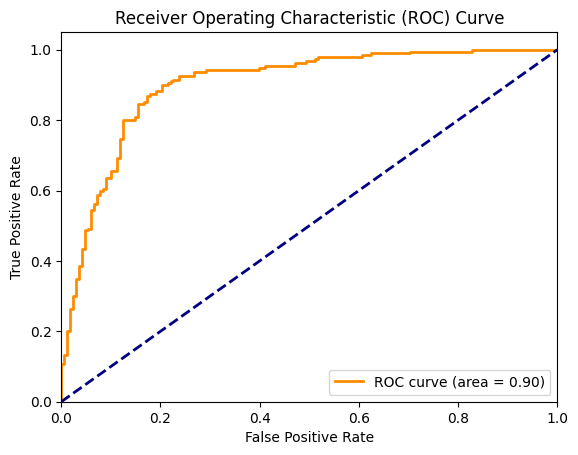

In [36]:
#training KAN model using best hyperparamter set from the previous trial
kan_model = KANClassifier(device='cuda', hidden_layer_size=3000, regularize_activation=.7,
                      regularize_entropy=.4, regularize_ridge=.3)

#fitting the model on train set
kan_model.fit(X_train, y_train, batch_size=64, lr=.07, weight_decay=.01, gamma=.6)

#predicting probabilities for the test set
y_prob = kan_model.predict_proba(X_test)[:, 1]

#creating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#ploting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
